# "Portuguese Bank Marketing Project using ML"


## "Predicting the subscription of a bank term deposit using machine learning"

# <font color=red>Install and import the required libraries and packages</font>

In [166]:
!pip install pingouin

In [167]:
!pip install -U scikit-learn

In [168]:
!pip install emoji

In [169]:
!pip install emojis

In [170]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

# importing required libraries and packages
import emoji
import emojis

import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from matplotlib import colors
from IPython.display import display_html
import scipy
from scipy.stats import pearsonr, spearmanr

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print(emoji.emojize(":laptop:")*28
      ,"\n\nAll the required libraries and packages are imported successfully !!!\n\n"
      ,emoji.emojize(":laptop:")*28)

💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻 

All the required libraries and packages are imported successfully !!!

 💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻


# <font color=red>Load the dataset</font>

In [171]:
#loading the datasets
data = pd.read_csv('../input/progetto-data-intensive-applications/bank-additional-full.csv',sep=';')

print(emoji.emojize(":file_folder:")*12
      ,"\n\nData loaded successfully !!!\n\n"
      ,emoji.emojize(":file_folder:")*12)

📁📁📁📁📁📁📁📁📁📁📁📁 

Data loaded successfully !!!

 📁📁📁📁📁📁📁📁📁📁📁📁


📝📝 <font color=skyblue>In the datasets the data is separated using ';', therefore, while reading the CSV file, we should instruct pandas about
the separator as the default separator is ','. If we do not instruct as mentioned, the dataframe will have all the data in one cell.</font>


In [172]:
# highlighting postive & negative values
def above_zero(val):
  """
  Takes value as input & returns in green color if positive,
  in red color if negative and black otherwise.

  """
  if val > 0:
    color = 'green'
  elif val < 0:
    color = 'red'
  else:
    color = 'black'   
  return 'color: %s' % color

In [173]:
# To have a glimpse of the data
print("\nGlimpse of data : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A60B2E'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_max(color='#0074FF',axis=0)\
.highlight_min(color='#00FFE5',axis=0)


Glimpse of data :  👇🏻👇🏻👇🏻



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [174]:
# Converting the target from binary/categoric into binary/numeric
data['target'] = data.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
data.drop(["y"],axis=1,inplace=True)

print(emojis.encode(":crayon:")*26
      ,"\n\nConverted the target from binary/categoric into binary/numeric.\n\n"
      ,emojis.encode(":crayon:")*26)


🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️ 

Converted the target from binary/categoric into binary/numeric.

 🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️🖍️


In [175]:
# Renaming some columns for better typing and calling variables
data.rename(columns={"emp.var.rate":"emp_var_rate","cons.price.idx":"cons_price_idx","cons.conf.idx":"cons_conf_idx","nr.employed":"nr_employed"},inplace=True)
data['nr_employed']=data['nr_employed'].astype('int64')

print(emojis.encode(":pencil2:")*25
      ,"\n\nRenamed some columns for better typing and calling variables\n\n"
      ,emojis.encode(":pencil2:")*25)


✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️ 

Renamed some columns for better typing and calling variables

 ✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️✏️


In [176]:
# Setting up numeric (num_data) and categoric (cat_data) dataframes
num_data = data.copy().select_dtypes(include=["float64","int64"])
cat_data = data.copy().select_dtypes(exclude=["float64","int64"])

print(emoji.emojize(":bookmark_tabs:")*28
      ,"\n\nSetting up numeric (num_data) and categoric (cat_data) dataframes\n\n"
      ,emoji.emojize(":bookmark_tabs:")*28)


📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑 

Setting up numeric (num_data) and categoric (cat_data) dataframes

 📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑📑


# <font color=red>Basic Info of the dataset</font>

In [177]:
#finding the no. of rows and cols
print("\nFinding the no. of rows and cols in the dataset : \n\n"
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("No. of clients : {}".format(data.shape[0]))
print("No. of features : {} including target".format(data.shape[1]))


Finding the no. of rows and cols in the dataset : 

 👇🏻👇🏻👇🏻

No. of clients : 41188
No. of features : 21 including target


In [178]:
# How many clients have subscribed the term deposit and how many didn't?
print("\nHow many clients have subscribed the term deposit and how many didn't ? \n\n "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("No. of clients who haven't subscribed the term deposit : {}".format(data.target.value_counts()[0]))
print("No. of clients who have subscribed the term deposit : {}".format(data.target.value_counts()[1]))


How many clients have subscribed the term deposit and how many didn't ? 

  👇🏻👇🏻👇🏻

No. of clients who haven't subscribed the term deposit : 36548
No. of clients who have subscribed the term deposit : 4640



 📈📈 Plotting the graph to check the dataset 📈📈 




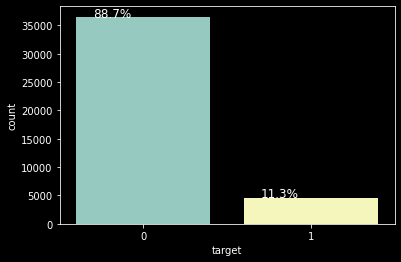

In [179]:
#Checking the dataset is balanced or not based on target values in the classification.
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting the graph to check the dataset'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')
print("")

plt.style.use('dark_background')
total = len(data['target'])*1
ax=sns.countplot(x='target',data=data)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)
    

📝📝 <font color=skyblue>The dataset is imbalanced and highly skewed, where the no. of neagative class is close to 8 times the no. of positive class.</font>

In [180]:
# Overview of shape, attributes, types and missing values
print("\nOverview of shape, attributes, types and missing values : \n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.info()


Overview of shape, attributes, types and missing values : 

 		 👇🏻👇🏻👇🏻

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  con

In [181]:
# General stats of the numerical variables
print("\nGeneral stats of the numerical variables : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.describe().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#753976'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).applymap(above_zero)


General stats of the numerical variables :  👇🏻👇🏻👇🏻



,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5166.849446,0.112654
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.328375,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000,1.000000


<font color=skyblue>
📝📝 Essence of above dataframe : <br> 
✏️ age: The youngest client is 17 years old and the oldest is 98 years with a median of 38 years whilst the average is 40 years old.<br>
✏️ campaign: Minimum number of contacts performed during this campaign and for this client included last contact is 1 and maximum is 56. On an average a client is contacted 3 times.<br>
✏️ pdays: The majority of the clients have the 999 number wich indicates that most people did not contact nor were contacted by the bank. Those are considered to be 'out of range' values.<br>
✏️ previous: The vast majority were never contacted before.<br>
✏️ emp_var_rate: during the period the index varied from [-3.4, 1.4]<br>
✏️ cons_price_idx: The index varied from [92.2, 94.8]<br>
✏️ cons_conf_idx: The consumer confidence level during that period kept always negative with a range of variation of [-51, -27]. These negative values might be explained by the recession that severely affected Portugal due the financial global crisis during that same period the data was recorded.<br>
✏️ euribor3m: There were a huge variation of the euribor rate during the period of analysis [5% to 0.6%]. This abrupt change in euribor together with the negative confidance verified reinforces the hipothesis that this data provides information from a crisis period.<br>
✏️ nr_employed: The number of employed people varied around 200 during the campaign.</font>

In [182]:
# General stats of the categorical variables
print("\nGeneral stats of the categorical variables : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.describe(include=['object']).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#117A65'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


General stats of the categorical variables :  👇🏻👇🏻👇🏻



,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


<font color=skyblue>
📝📝 Essence of above dataframe : <br>
✏️ job: there are 12 types of jobs recordings in wich the 'administrative' role is the most comum with almost 10.5k of the clients<br>
✏️ marital: the majority of clients are married with almost 25k records<br>
✏️ education: more than 12k people have university degree<br>
✏️ default: from all the 41.188 clients, 32.588 don't have any credit in default<br>
✏️ housing: almost half of the customers have a housing loan<br>
✏️ loan: almost 34k clients don't have any personal loans<br>
✏️ poutcome: there is no information about the outcome of any previous marketing campaign</font>

# <font color=red>Exploratory Data Analysis</font>

## <font color=green>1. Finding duplicate values</font>

In [183]:
# checking for duplicate values if present in the dataframe
print("Duplicate Data"
,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":cross_mark_button:")*3
,"\n\n",data.duplicated().any()
,"\n\n",emoji.emojize(":cross_mark_button:")*3)

Duplicate Data ❓❓ 

❎❎❎ 

 True 

 ❎❎❎


In [184]:
#collapse 
# Selecting duplicate rows except first occurence based on all columns
duplicate_data = data[data.duplicated(keep = "last")]
print('\nduplicate rows : '
,"{}\n".format(duplicate_data.shape[0])
,"\n\n",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
# print the resulatant dataframe containing duplicate rows
duplicate_data.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#2B0E46'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


duplicate rows :  12
 

 👇🏻👇🏻👇🏻



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.855000,5191,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.400000,93.918000,-42.700000,4.966000,5228,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.400000,93.918000,-42.700000,4.962000,5228,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.400000,93.918000,-42.700000,4.962000,5228,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.400000,93.918000,-42.700000,4.968000,5228,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.400000,93.444000,-36.100000,4.965000,5228,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.400000,93.444000,-36.100000,4.966000,5228,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.100000,93.200000,-42.000000,4.153000,5195,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.800000,93.075000,-47.100000,1.423000,5099,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.800000,92.893000,-46.200000,1.313000,5099,0


In [185]:
# removing duplicate values
data = data.drop_duplicates(keep='last')
print(emojis.encode(":scissors:")*16
    ,"\n\nDuplicate data removed successfully !!\n\n"
    ,emojis.encode(":scissors:")*16)

✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️ 

Duplicate data removed successfully !!

 ✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️


## <font color=green>2. Finding Unwanted Columns</font>



📝📝 <font color=skyblue>duration attribute :  This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</font>

## <font color=green>3. Finding Missing Values</font>



📝📝 <font color=skyblue>There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label by leaving as it is or treated using deletion or imputation techniques.
We need to check the performance on all the 3 cases and check how these approaches help.</font>

In [186]:
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data.isnull().values.any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Missing values ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


In [187]:
# Features containing 'unknown' values

# making a list of missing value types
missing_values = ['unknown']

# reading data again with the defined non-standard missing value
new_data = pd.read_csv('../input/progetto-data-intensive-applications/bank-additional-full.csv',sep=';', na_values = missing_values)

print('\nMissing Values as "Unknown" in the data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

new_data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Missing Values as "Unknown" in the data :  👇🏻👇🏻👇🏻



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,nan,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
5,45,services,married,basic.9y,nan,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
7,41,blue-collar,married,nan,nan,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [188]:
#getting total no. of 'unknown' values
print('\nCount of Missing Values as "Unknown" in each column of the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

new_data.isnull().sum().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Count of Missing Values as "Unknown" in each column of the data : 

   👇🏻👇🏻👇🏻



,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


📝📝 <font color=skyblue>There are 6 categorical features - job, marital, education, default, housing & loan containing the non-standard missing value 'unknown'.</font>

In [189]:
new_data.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], axis=1,inplace=True)
del new_data

print(emojis.encode(":x:")*14
    ,"\n\nDataframe deleted successfully !!\n\n"
    ,emojis.encode(":x:")*14)

❌❌❌❌❌❌❌❌❌❌❌❌❌❌ 

Dataframe deleted successfully !!

 ❌❌❌❌❌❌❌❌❌❌❌❌❌❌


## <font color=green>4. Finding Features with one value</font>

In [190]:
# All the features with their unique values
print('\nUnique Values in each column of the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
for column in data.columns:
  print(emoji.emojize(":arrow_right:", use_aliases=True)
  ,column
  ,emoji.emojize(":1234:", use_aliases=True)
  ,data[column].nunique())


Unique Values in each column of the data : 

   👇🏻👇🏻👇🏻

➡️ age 🔢 78
➡️ job 🔢 12
➡️ marital 🔢 4
➡️ education 🔢 8
➡️ default 🔢 3
➡️ housing 🔢 3
➡️ loan 🔢 3
➡️ contact 🔢 2
➡️ month 🔢 10
➡️ day_of_week 🔢 5
➡️ duration 🔢 1544
➡️ campaign 🔢 42
➡️ pdays 🔢 27
➡️ previous 🔢 8
➡️ poutcome 🔢 3
➡️ emp_var_rate 🔢 10
➡️ cons_price_idx 🔢 26
➡️ cons_conf_idx 🔢 26
➡️ euribor3m 🔢 316
➡️ nr_employed 🔢 11
➡️ target 🔢 2


📝📝 <font color=skyblue>There is no feature with 1 value.</font>

## <font color=green>5. Exploring the numerical features</font>

In [191]:
#list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes!='O') & (feature not in ['target']))]
print('No. of numerical variables'
,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")*2
,len(numerical_features))
print("")
#all the numerical variables
for feature in numerical_features:
    print("The variable"
    ,emoji.emojize(":memo:")
    ,"'{}'".format(feature)
    ,"has datatype"
    ,emoji.emojize(":1234:", use_aliases=True)
    ,"{}".format(data[feature].dtypes)
    ,"and"
    ,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")
    ,"{}".format(len(data[feature].unique()))
    ,"unique values")
 

No. of numerical variables 👉🏻👉🏻 10

The variable 📝 'age' has datatype 🔢 int64 and 👉🏻 78 unique values
The variable 📝 'duration' has datatype 🔢 int64 and 👉🏻 1544 unique values
The variable 📝 'campaign' has datatype 🔢 int64 and 👉🏻 42 unique values
The variable 📝 'pdays' has datatype 🔢 int64 and 👉🏻 27 unique values
The variable 📝 'previous' has datatype 🔢 int64 and 👉🏻 8 unique values
The variable 📝 'emp_var_rate' has datatype 🔢 float64 and 👉🏻 10 unique values
The variable 📝 'cons_price_idx' has datatype 🔢 float64 and 👉🏻 26 unique values
The variable 📝 'cons_conf_idx' has datatype 🔢 float64 and 👉🏻 26 unique values
The variable 📝 'euribor3m' has datatype 🔢 float64 and 👉🏻 316 unique values
The variable 📝 'nr_employed' has datatype 🔢 int64 and 👉🏻 11 unique values


## <font color=green>6. Distribution of numerical features</font>

In [192]:
def num_histplot(feature, dataset):
    """
    It takes the numerical variable and dataset as 
    input and plots the histogram for the particular.
    
    """
    if feature in numerical_features:
        print("\n\t\t    ",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Distribution of '{}'".format(feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        sns.histplot(dataset[feature], kde=True, bins=10,color='#F78AB2')
        plt.show()
            
    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"It's not a numerical feature !!!"
              ,emoji.emojize(":cross_mark:")*2)


## <font color=green>7. Relationship b/w numerical features and the target label</font>

In [193]:
def num_boxplot_wrt_Y(feature, dataset):
    """
    It takes the numerical variable and dataset as input and plots the boxplot 
    for the particular with styler object of Skewness, Kurtosis, Median, Count, Mean
    ,Standard Deviation, Min. value, Q1, Q2, Q3, Q4, Max. value, IQR, Lower Outliers Limit
    ,Upper Outliers Limit, Lower Outliers Count with percentage, Upper Outliers Count with 
    percentage,Outliers Count with percentage .
    
    """
    if feature in numerical_features:
        print("\n\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Boxplot of '{}' w.r.t target".format(feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")
        #plotting the boxplot
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        sns.boxplot(x='target',y=dataset[feature] , data=dataset, palette='flare')
        plt.xlabel(feature)
        plt.show()
        
        #  Parameters to check presence of outliers in the distribution
        v1 = pd.DataFrame({' Parameters ': ' Skewness'
                         , ' Values ' : "{:.2f}".format(dataset[feature].skew())},index={'1'})
        
        v2 = pd.DataFrame({' Parameters ': ' Kurtosis'
                         , ' Values ' : "{:.2f}".format(dataset[feature].kurtosis())},index={'2'})
        
        v3 = pd.DataFrame({' Parameters ': ' Median'
                         , ' Values ' : "{:.2f}".format(dataset[feature].quantile())},index={'3'})

        v4 = pd.DataFrame({' Parameters ': ' Count'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[0])},index={'4'})
        
        v5 = pd.DataFrame({' Parameters ': ' Mean'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[1])},index={'5'})
        
        v6 = pd.DataFrame({' Parameters ': ' Stand. Dev.'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[2])},index={'6'})
        
        v7 = pd.DataFrame({' Parameters ': ' Minimum'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[3])},index={'7'})
        
        v8 = pd.DataFrame({' Parameters ': ' Q1 (25%)'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[4])},index={'8'})
        
        v9 = pd.DataFrame({' Parameters ': ' Q2 (50%)'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[5])},index={'9'})
        
        v10 = pd.DataFrame({' Parameters ': ' Q3 (75%)'
                          , ' Values ' : "{:.2f}".format(dataset[feature].describe()[6])},index={'10'})
        
        v11 = pd.DataFrame({' Parameters ': ' Maximum'
                          , ' Values ' : "{:.2f}".format(dataset[feature].describe()[7])},index={'11'})
        
        #finding Interquartile range      
        iqr = dataset[feature].quantile(q = 0.75) - dataset[feature].quantile(q = 0.25)
        v12 = pd.DataFrame({' Parameters ': ' IQR'
                          , ' Values ' : "{:.2f}".format(iqr)},index={'12'})

        #Outlier detection from IQR
        lower_outliers = dataset[feature].quantile(q = 0.25) - (iqr*1.5)
        v13 = pd.DataFrame({' Parameters ': ' Lower outliers Limit '
                          , ' Values ' : "{:.2f} ".format(lower_outliers)},index={'13'})

        upper_outliers = dataset[feature].quantile(q = 0.75) + (iqr*1.5)
        v14 = pd.DataFrame({' Parameters ': ' Upper outliers Limit '
                          , ' Values ' : "{:.2f}".format(upper_outliers)},index={'14'})
        
        #checking the presence of outliers with upper & lower limits
        lower_out_count = dataset[(dataset[feature] < (dataset[feature].quantile(q = 0.25)-(iqr*1.5)) )][feature].count()
        lower_out_pct = round(lower_out_count / dataset[feature].count() * 100, 1)
        v15 = pd.DataFrame({' Parameters ': ' Lower outliers count '
                          , ' Values ' : "{} ({}%)".format(lower_out_count, lower_out_pct)},index={'15'})

        upper_out_count = dataset[(dataset[feature] > (dataset[feature].quantile(q = 0.75)+(iqr*1.5)) )][feature].count()
        upper_out_pct = round(upper_out_count / dataset[feature].count() * 100, 1)
        v16 = pd.DataFrame({' Parameters ': ' Upper outliers count '
                          , ' Values ' : "{} ({}%)".format(upper_out_count, upper_out_pct)},index={'16'})

        outliers = dataset[(dataset[feature]< (dataset[feature].quantile(q = 0.25)-(iqr*1.5)))
                         | (dataset[feature] > (dataset[feature].quantile(q = 0.75)+(iqr*1.5)) )][feature].count()

        outliers_pct = round(outliers / dataset[feature].count() * 100, 1)
        v17 = pd.DataFrame({' Parameters ': ' Outliers count '
                          , ' Values ' : "{} ({}%)".format(outliers, outliers_pct)},index={'17'})
      
        result = pd.concat([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17])
    
        result.columns = [' Parameters ',' Values ']
        
        if outliers==0:
          print("\n",emoji.emojize(":check_mark:")*2
                ,emoji.emojize(":thumbs_up_light_skin_tone:")*2
                ," NO Outliers "
                ,emoji.emojize(":thumbs_up_light_skin_tone:")*2
                ,emoji.emojize(":check_mark:")*2,"\n")
          not_outliers = dataset[(dataset[feature]>= (dataset[feature].quantile(q = 0.25)-(iqr*1.5)))
                               | (dataset[feature] <= (dataset[feature].quantile(q = 0.75)+(iqr*1.5)) )][feature].count()
                               
          not_outliers_pct = round(not_outliers / dataset[feature].count() * 100, 1)
            
          result = result.iloc[:-5,:]
          v18 = pd.DataFrame({' Parameters ': ' observation count w/o outliers '
                            , ' Values ' : "{} ({}%)".format(not_outliers, not_outliers_pct)},index={'13'})
          result = pd.concat([result,v18])
          result.columns = [' Parameters ',' Values ']

        else:
          print("\n",emoji.emojize(":cross_mark:")*2
              ,emoji.emojize(":thumbs_down_light_skin_tone:")*2
              ,"Outliers Present"
              ,emoji.emojize(":thumbs_down_light_skin_tone:")*2
              ,emoji.emojize(":cross_mark:")*2,"\n")  
          
        result = result.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#34495E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#FEF5E7'}, subset=[' Parameters '])

        return result

    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"It's not a numerical feature !!!"
              ,emoji.emojize(":cross_mark:")*2)

#### <font color=red>Feature : age</font>


		     📈📈📈 Distribution of 'age' 📈📈📈



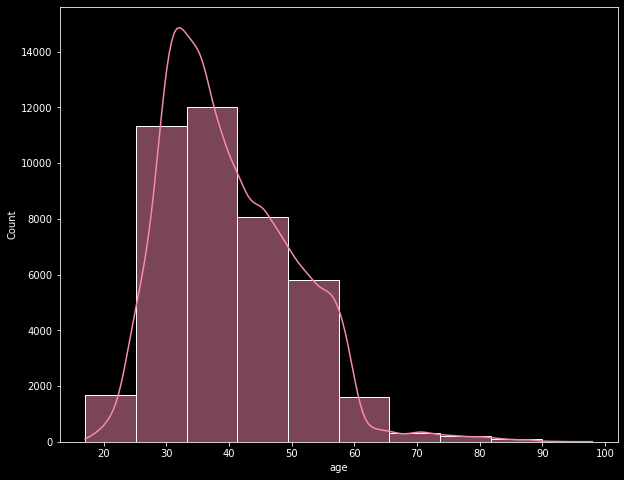


			 📃📃 Discription: clients' age 📃📃


In [194]:
num_histplot('age', data)
print("\n\t\t\t",emoji.emojize(":page_with_curl:")*2
      ,"Discription: clients' age"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>We can see that this plot is right-skewed,but also similar to normal distribution. In the above distribution, we can see that most of the customers are in the age range of 30-40.</font>


		 📈📈📈 Boxplot of 'age' w.r.t target 📈📈📈



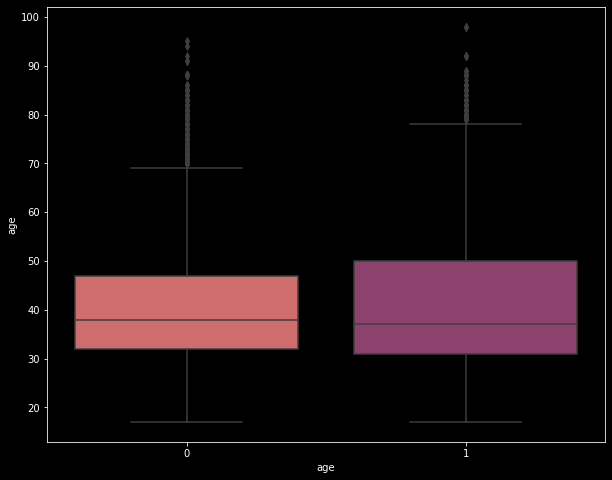


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,0.78
2,Kurtosis,0.79
3,Median,38.00
4,Count,41176.00
5,Mean,40.02
6,Stand. Dev.,10.42
7,Minimum,17.00
8,Q1 (25%),32.00
9,Q2 (50%),38.00
10,Q3 (75%),47.00


In [195]:
num_boxplot_wrt_Y('age', data)

📝📝 <font color=skyblue>From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. We see distribution for clients, who subscribed a term deposit is more diffused,but it is because people who said yes are less.</font>

In [196]:
# grouping the clients on the basis of age
print('\nGrouping the clients on the basis of age : \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data['age_bins'] = pd.cut(data['age'], bins = [data['age'].min(), 30, 60, data['age'].max()], 
                  labels=['Young', 'Adult', 'Senior'])

group_age_target1 = pd.DataFrame(data.groupby(['age_bins'])['target'].mean().multiply(100))
group_age_target = pd.DataFrame(data.groupby(['age_bins'])['target'].mean().multiply(100))

group_age_target = group_age_target.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#E06689 '),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)
group_age_target


Grouping the clients on the basis of age : 

 	 👇🏻👇🏻👇🏻



,target
age_bins,
Young,15.211497
Adult,9.429544
Senior,45.544554



 📈📈 Plotting the clients on the basis of age group 📈📈 




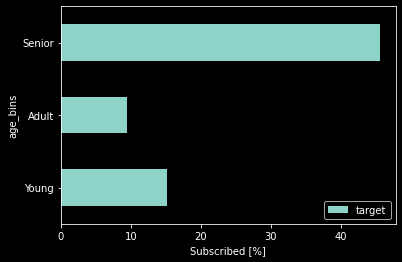

In [197]:
# Display graph
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting the clients on the basis of age group'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')
print("")

group_age_target1.plot.barh()
plt.xlabel('Subscribed [%]');

📝📝 <font color=skyblue>It is very clear the relation betweem the subscription rate and age of customers:<br>
✏️ 45.5% of Seniors (+60 years old) subscribed to the term deposit<br>
✏️ less than 1 in 10 Adults (>30 and <=60 years old) subscribed<br>
✏️ Young people were the 2nd group that subscribed the deposit corresponding to 1/6 of all young people.<br>
✏️ Senior subscribers alone were almost as much as Young and Adults subscribers, respectively, all together.</font>

#### <font color=red>Feature : campaign</font>


		     📈📈📈 Distribution of 'campaign' 📈📈📈



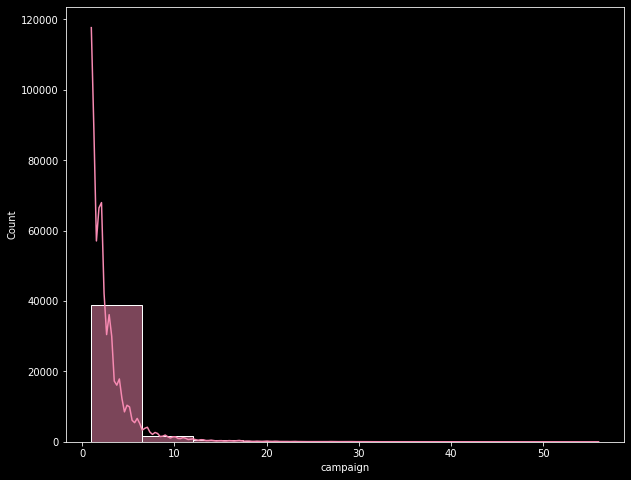


 📃📃 Discription: number of contacts performed during this campaign and for this client included last contact 📃📃


In [198]:
num_histplot('campaign', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: number of contacts performed during this campaign and for this client included last contact"
      ,emoji.emojize(":page_with_curl:")*2)


		 📈📈📈 Boxplot of 'campaign' w.r.t target 📈📈📈



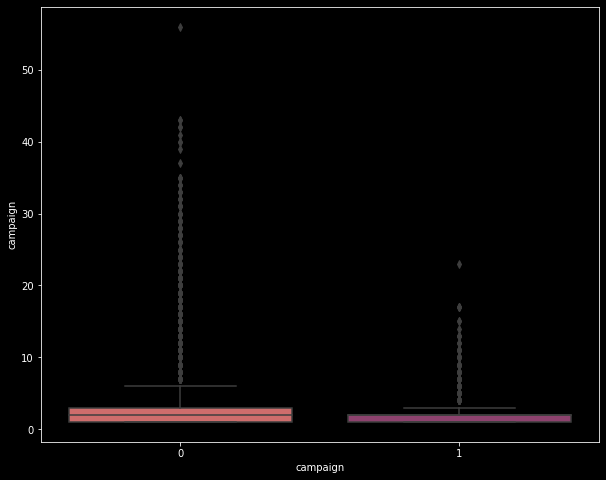


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,4.76
2,Kurtosis,36.97
3,Median,2.00
4,Count,41176.00
5,Mean,2.57
6,Stand. Dev.,2.77
7,Minimum,1.00
8,Q1 (25%),1.00
9,Q2 (50%),2.00
10,Q3 (75%),3.00


In [199]:
#collapse 
num_boxplot_wrt_Y('campaign', data)

📝📝 <font color=skyblue>The 'campaign' attribute shows the total no. of contacts performed by the bank during the marketing campaigns. We can see that the plot is right-skewed which shows that the no. of clients contacted who did not subscribed to the bank term deposit policy was more than the no. of clients were contacted that did subscribed to the bank term deposit.</font>

#### <font color=red>Feature : pdays</font>


		     📈📈📈 Distribution of 'pdays' 📈📈📈



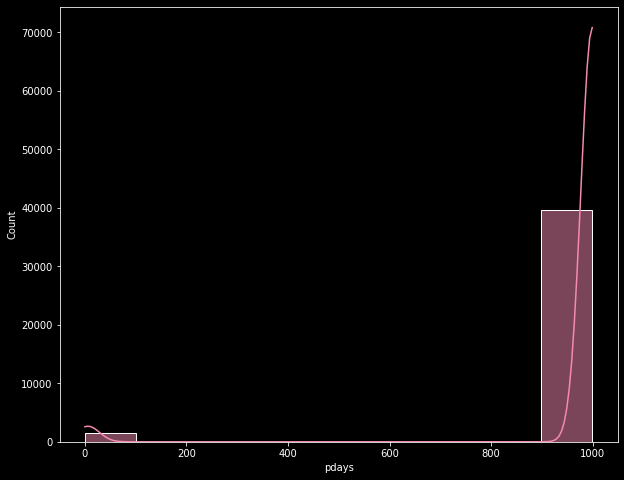


 📃📃 Discription: number of days that passed by after the client was last contacted from a previous campaign 📃📃


In [200]:
num_histplot('pdays', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: number of days that passed by after the client was last contacted from a previous campaign"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>This attribute shows the no. of days that passed by after the client was previously contacted by the campaign team. The value of pdays from 999 and upwards, means the client was not contacted previously.</font>

In [201]:
print('\nUnique Values in "pdays" \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data["pdays"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#035753'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Unique Values in "pdays" 

   👇🏻👇🏻👇🏻



,pdays
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52
5,46


📝📝 <font color=skyblue>It can be seen that the lesser the no. of days that passed by the higher the no. of contacts made previously.
Most of the values are 999, which means that the most of the customers have never been contacted before.</font>


		 📈📈📈 Boxplot of 'pdays' w.r.t target 📈📈📈



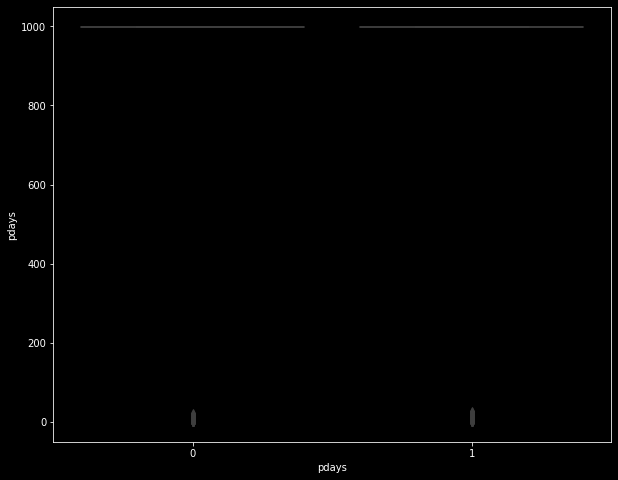


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,-4.92
2,Kurtosis,22.22
3,Median,999.00
4,Count,41176.00
5,Mean,962.46
6,Stand. Dev.,186.94
7,Minimum,0.00
8,Q1 (25%),999.00
9,Q2 (50%),999.00
10,Q3 (75%),999.00


In [202]:
num_boxplot_wrt_Y('pdays', data)


 📈📈 No. of days passed by after the client was last contacted from a previous campaign 📈📈 




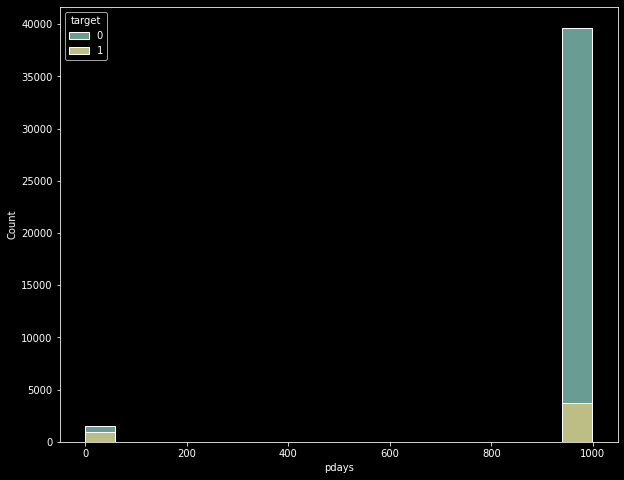

In [203]:
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'No. of days passed by after the client was last contacted from a previous campaign'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')
print("")

plt.figure(figsize=(10,8))
sns.histplot(data=data, x="pdays", hue="target", multiple="stack")
plt.show()


 📈📈 Plotting the days that passed by after previous campaign 📈📈 

Median: 6.0



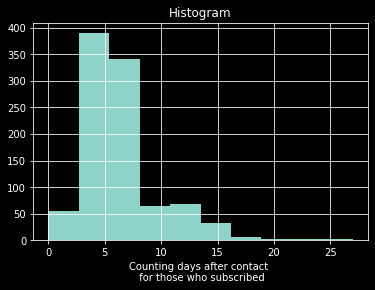

In [204]:
# counting the days that passed by after previous campaign
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting the days that passed by after previous campaign'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')

dummy = data.loc[(data['pdays']!=999) & (data['target'] == 1), 'pdays']
print('Median: {:.2}\n'.format(dummy.median()))
dummy.hist().grid(True)
plt.title('Histogram')
plt.xlabel('Counting days after contact \n for those who subscribed');


📝📝 <font color=skyblue>Considering only the clients who had subscribed let's count the days that passed by after contact from a previous campaign. Most of the people will respond on the 6th day and within 8 days.</font>

#### <font color=red>Feature : previous</font>


		     📈📈📈 Distribution of 'previous' 📈📈📈



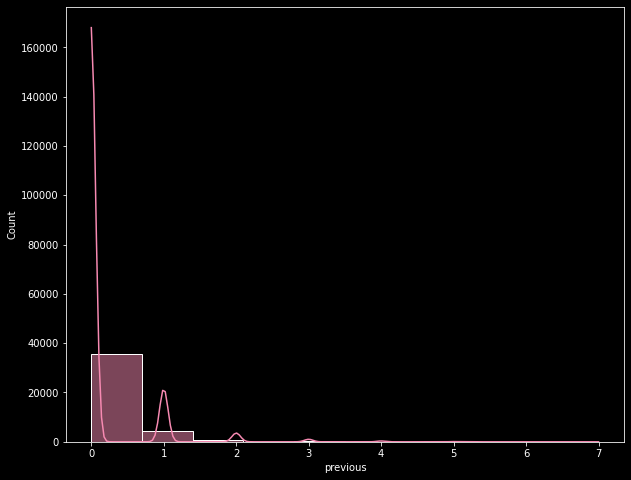


 📃📃 Discription: number of contacts performed before this campaign and for this client 📃📃


In [205]:
num_histplot('previous', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: number of contacts performed before this campaign and for this client"
      ,emoji.emojize(":page_with_curl:")*2)

In [206]:
print('\nUnique Values in "previous" \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data["previous"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Unique Values in "previous" 

   👇🏻👇🏻👇🏻



,previous
0,35551
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


In [207]:
print("People who were previously contacted with success"
,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")*2
," {}\n".format(data.poutcome.value_counts()[1]))

data[data["target"]==1]["previous"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)

People who were previously contacted with success 👉🏻👉🏻  4252



,previous
0,3140
1,967
2,350
3,128
4,38
5,13
6,3


In [208]:
print("People who were previously contacted with failure"
,emoji.emojize(":backhand_index_pointing_right_light_skin_tone:")*2
," {}\n".format(data.poutcome.value_counts()[2]))

data[data["target"]==0]["previous"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)

People who were previously contacted with failure 👉🏻👉🏻  1373



,previous
0,32411
1,3594
2,404
3,88
4,32
5,5
6,2
7,1


📝📝 <font color=skyblue>People that were previously contacted subscribed in a much higher rate to the term deposit. The vast majority were never been contacted before.</font>


 📈📈 Plotting the people who were previously contacted 📈📈 



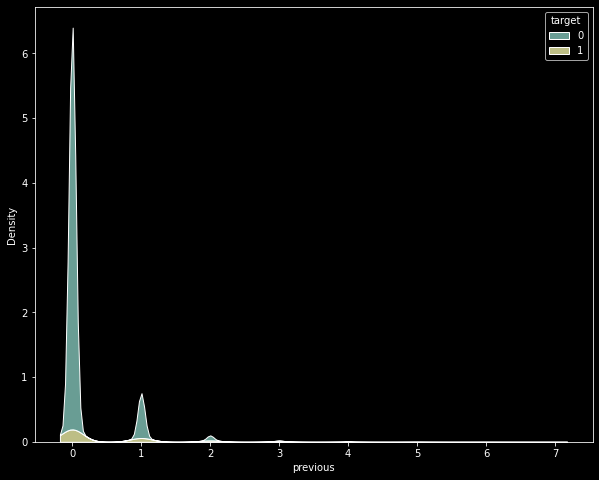

In [209]:
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting the people who were previously contacted'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')

plt.figure(figsize=(10,8))
sns.kdeplot(data=data, x="previous", hue="target", multiple="stack")
plt.show()

📝📝 <font color=skyblue>The previous feature is similarly distributed for both the classes in the target variable. From here we can see that mostly people who were not contacted previously have not subscribed to the bank term deposit.</font>


	 📈📈 Boxplot of the people who were previously contacted 📈📈 



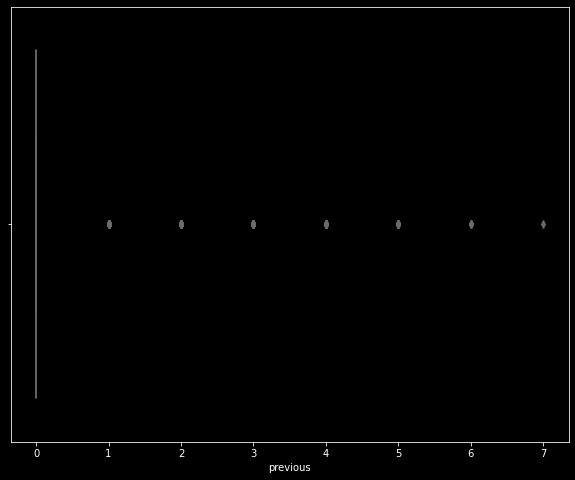


		 📈📈📈 Boxplot of 'previous' w.r.t target 📈📈📈



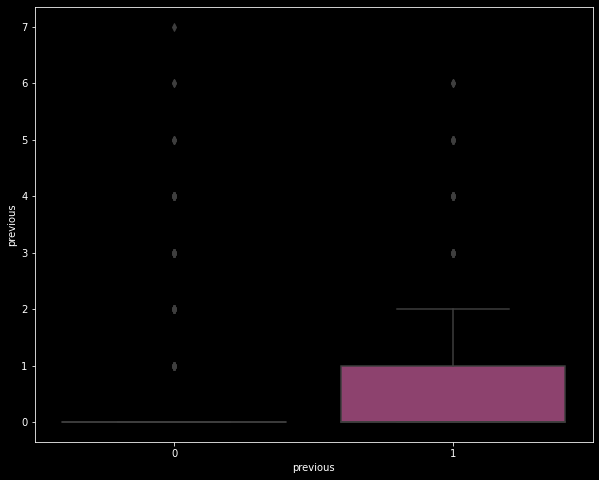


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,3.83
2,Kurtosis,20.10
3,Median,0.00
4,Count,41176.00
5,Mean,0.17
6,Stand. Dev.,0.49
7,Minimum,0.00
8,Q1 (25%),0.00
9,Q2 (50%),0.00
10,Q3 (75%),0.00


In [210]:
print('\n\t',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Boxplot of the people who were previously contacted'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')

plt.figure(figsize=(10,8))
sns.boxplot(x='previous', data=data)
plt.xlabel('previous')
plt.show()

num_boxplot_wrt_Y('previous', data)

#### <font color=red>Feature : emp_var_rate</font>


		     📈📈📈 Distribution of 'emp_var_rate' 📈📈📈



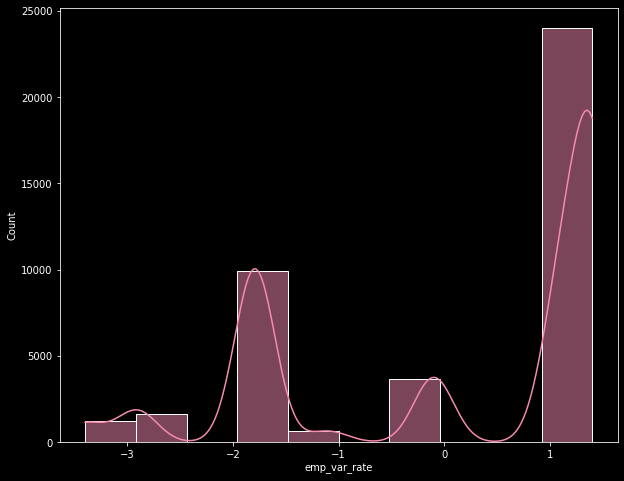


 📃📃 Discription: employment variation rate - quarterly indicator 📃📃


In [211]:
num_histplot('emp_var_rate', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: employment variation rate - quarterly indicator"
      ,emoji.emojize(":page_with_curl:")*2)

In [212]:
#collapse 
print('\nUnique Values in "emp_var_rate" \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data["emp_var_rate"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#424B17'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Unique Values in "emp_var_rate" 

 	 👇🏻👇🏻👇🏻



,emp_var_rate
1.4,16228
-1.8,9182
1.1,7762
-0.1,3682
-2.9,1662
-3.4,1070
-1.7,773
-1.1,635
-3.0,172
-0.2,10


In [213]:
print('\nEmployment Variation Rate with successful subscription  \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data[data["target"]==1]["emp_var_rate"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#424B17'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Employment Variation Rate with successful subscription  

 	 👇🏻👇🏻👇🏻



,emp_var_rate
-1.8,1461
1.4,866
-2.9,593
-3.4,454
-1.7,403
-1.1,301
1.1,240
-0.1,232
-3.0,88
-0.2,1


In [214]:
print('\nEmployment Variation Rate with failure in subscription  \n\n'
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data[data["target"]==0]["emp_var_rate"].value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#424B17'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Employment Variation Rate with failure in subscription  

 👇🏻👇🏻👇🏻



,emp_var_rate
1.4,15362
-1.8,7721
1.1,7522
-0.1,3450
-2.9,1069
-3.4,616
-1.7,370
-1.1,334
-3.0,84
-0.2,9



		 📈📈📈 Boxplot of 'emp_var_rate' w.r.t target 📈📈📈



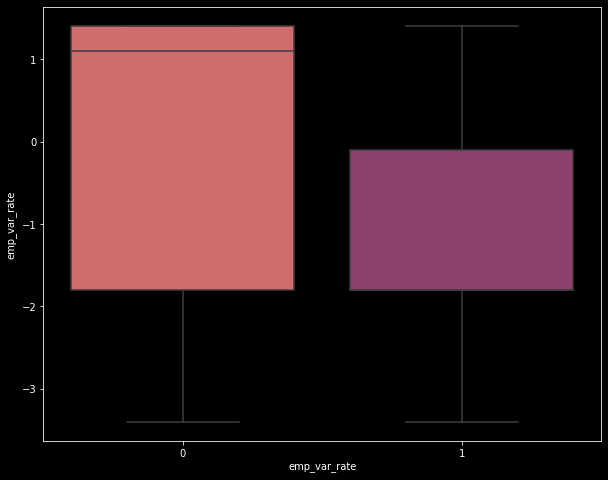


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,-0.72
2,Kurtosis,-1.06
3,Median,1.10
4,Count,41176.00
5,Mean,0.08
6,Stand. Dev.,1.57
7,Minimum,-3.40
8,Q1 (25%),-1.80
9,Q2 (50%),1.10
10,Q3 (75%),1.40


In [215]:
num_boxplot_wrt_Y('emp_var_rate', data)

📝📝 <font color=skyblue>When the emp_var_rate (the employment rate) is negative there is a higher positive response to the campaign.</font>

#### <font color=red>Feature : cons_price_idx</font>


		     📈📈📈 Distribution of 'cons_price_idx' 📈📈📈



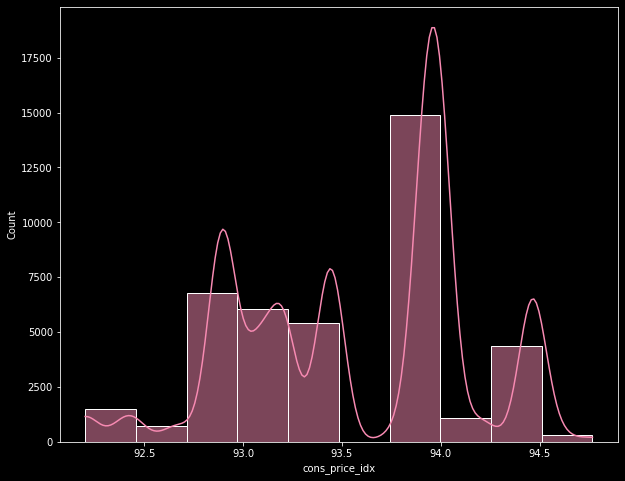


 📃📃 Discription: consumer price index - monthly indicator 📃📃


In [216]:
num_histplot( 'cons_price_idx', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: consumer price index - monthly indicator"
      ,emoji.emojize(":page_with_curl:")*2)


		 📈📈📈 Boxplot of 'cons_price_idx' w.r.t target 📈📈📈



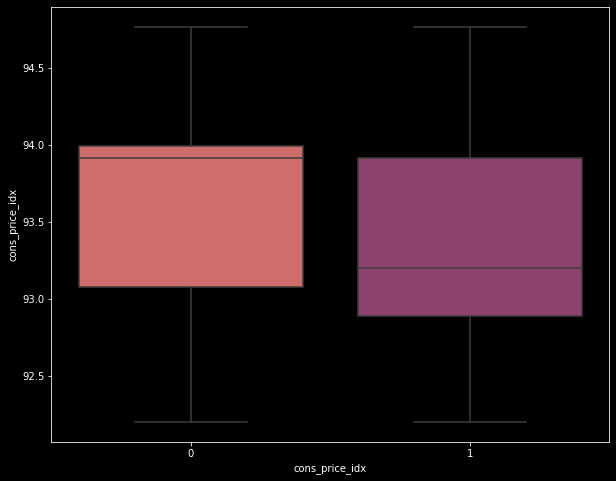


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,-0.23
2,Kurtosis,-0.83
3,Median,93.75
4,Count,41176.00
5,Mean,93.58
6,Stand. Dev.,0.58
7,Minimum,92.20
8,Q1 (25%),93.08
9,Q2 (50%),93.75
10,Q3 (75%),93.99


In [217]:
num_boxplot_wrt_Y( 'cons_price_idx', data)

📝📝 <font color=skyblue>When the cons_price_idx (consumer price index) increases there is a strong negative response from the clients' subscriptions.</font>

#### <font color=red>Feature : cons_conf_idx</font>


		     📈📈📈 Distribution of 'cons_conf_idx' 📈📈📈



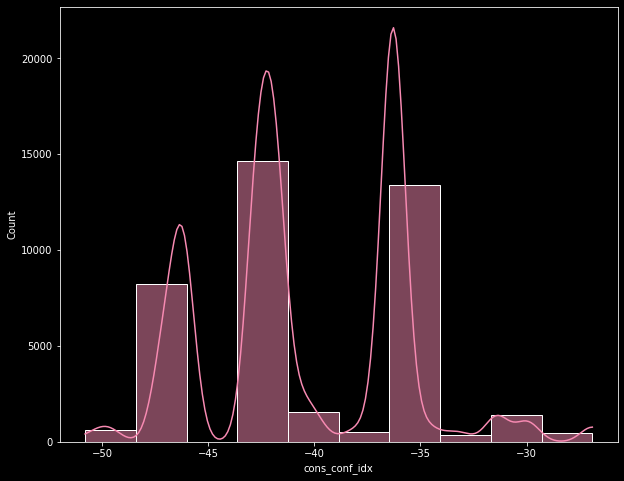


 📃📃 Discription: consumer confidence index - monthly indicator 📃📃


In [218]:
num_histplot('cons_conf_idx', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: consumer confidence index - monthly indicator"
      ,emoji.emojize(":page_with_curl:")*2)


		 📈📈📈 Boxplot of 'cons_conf_idx' w.r.t target 📈📈📈



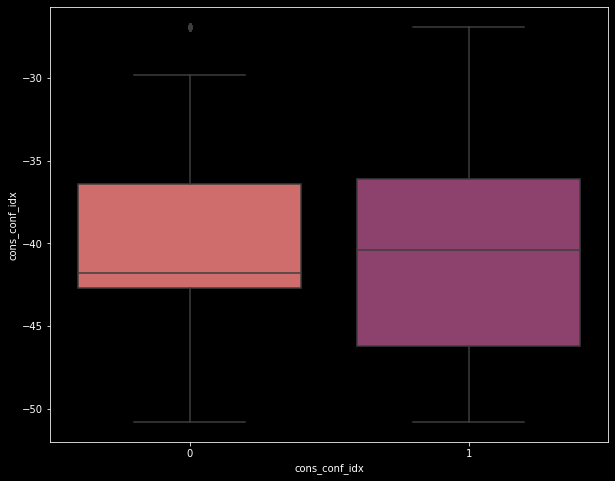


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,0.30
2,Kurtosis,-0.36
3,Median,-41.80
4,Count,41176.00
5,Mean,-40.50
6,Stand. Dev.,4.63
7,Minimum,-50.80
8,Q1 (25%),-42.70
9,Q2 (50%),-41.80
10,Q3 (75%),-36.40


In [219]:
num_boxplot_wrt_Y('cons_conf_idx', data)

#### <font color=red>Feature : euribor3m</font>


		     📈📈📈 Distribution of 'euribor3m' 📈📈📈



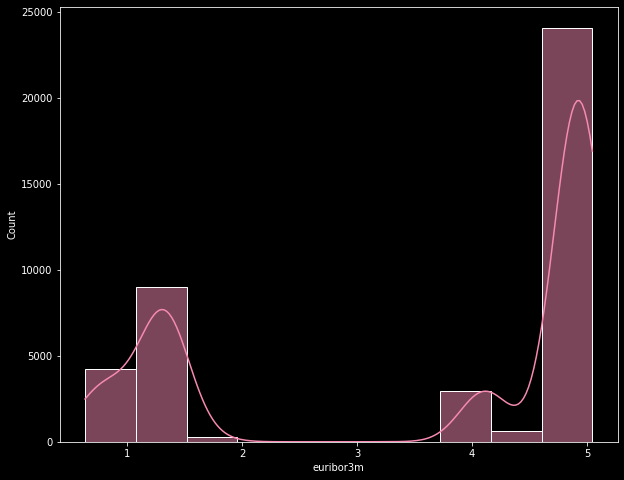


 📃📃 Discription: euribor 3 month rate - daily indicator 📃📃


In [220]:
num_histplot('euribor3m', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: euribor 3 month rate - daily indicator"
      ,emoji.emojize(":page_with_curl:")*2)


		 📈📈📈 Boxplot of 'euribor3m' w.r.t target 📈📈📈



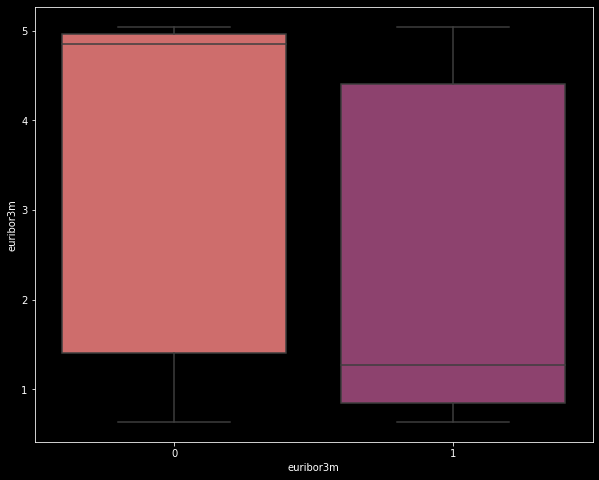


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,-0.71
2,Kurtosis,-1.41
3,Median,4.86
4,Count,41176.00
5,Mean,3.62
6,Stand. Dev.,1.73
7,Minimum,0.63
8,Q1 (25%),1.34
9,Q2 (50%),4.86
10,Q3 (75%),4.96


In [221]:
num_boxplot_wrt_Y('euribor3m', data)

📝📝 <font color=skyblue>The lower the euribor3m is, the higher the number of subscriptions.</font>

#### <font color=red>Feature : nr_employed</font>


		     📈📈📈 Distribution of 'nr_employed' 📈📈📈



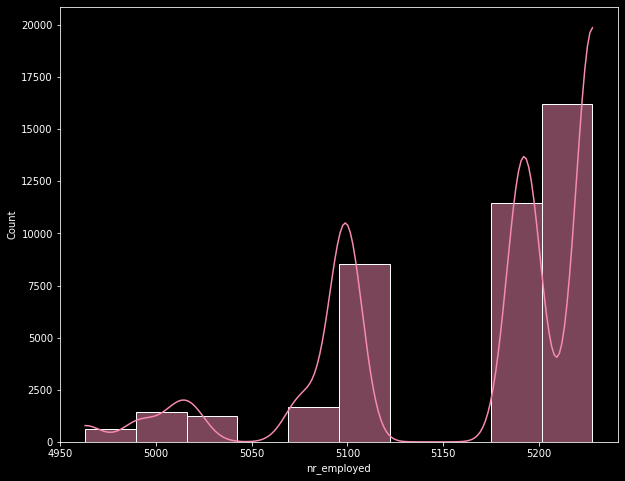


 📃📃 Discription: number of employed citizens - quarterly indicator 📃📃


In [222]:
num_histplot('nr_employed', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: number of employed citizens - quarterly indicator"
      ,emoji.emojize(":page_with_curl:")*2)


 📈📈 Plotting no. of employed people 📈📈 



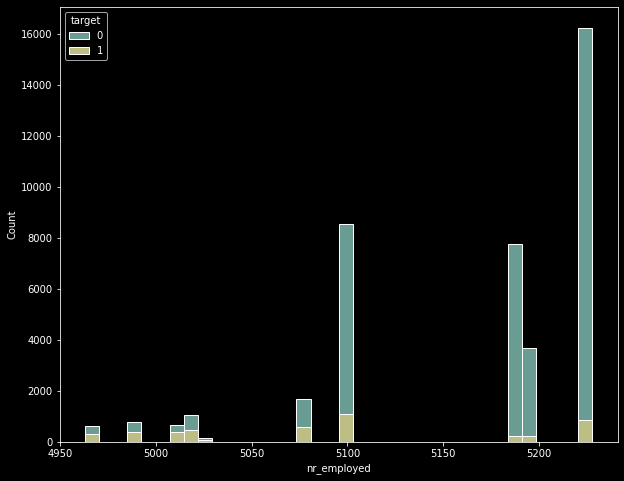

In [223]:
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting no. of employed people'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')

plt.figure(figsize=(10,8))
sns.histplot(data=data, x="nr_employed", hue="target", multiple="stack")
plt.show()


		 📈📈📈 Boxplot of 'nr_employed' w.r.t target 📈📈📈



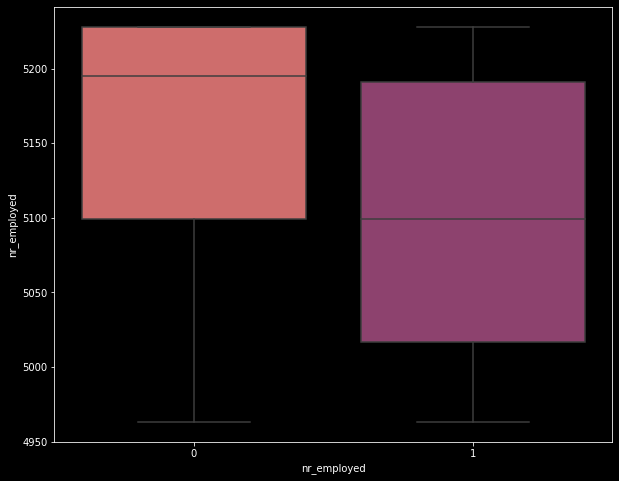


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,-1.05
2,Kurtosis,0.01
3,Median,5191.00
4,Count,41176.00
5,Mean,5166.85
6,Stand. Dev.,72.33
7,Minimum,4963.00
8,Q1 (25%),5099.00
9,Q2 (50%),5191.00
10,Q3 (75%),5228.00


In [224]:
num_boxplot_wrt_Y('nr_employed', data)

📝📝 <font color=skyblue>From here, we can see that people that were contacted had higher rates of subscription. The above histogram shows that the first contacts were exclusively made to known clients resulting in a much more efficient campaign with a low number of employed people.</font>

## <font color=green>8. Exploring categorical features.</font>

In [225]:
# displaying each categorical feature with its unique no. of categories
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['y']))]
for feature in categorical_features:
    print("\nThe variable '{}' has {} categories ".format(feature,len(data[feature].unique()))
          ,"\n"
          ,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3
          ,"\n"
          ,"{}".format(data[feature].unique()))
 


The variable 'job' has 12 categories  
 		 👇🏻👇🏻👇🏻 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

The variable 'marital' has 4 categories  
 		 👇🏻👇🏻👇🏻 
 ['married' 'single' 'divorced' 'unknown']

The variable 'education' has 8 categories  
 		 👇🏻👇🏻👇🏻 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

The variable 'default' has 3 categories  
 		 👇🏻👇🏻👇🏻 
 ['no' 'unknown' 'yes']

The variable 'housing' has 3 categories  
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes' 'unknown']

The variable 'loan' has 3 categories  
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes' 'unknown']

The variable 'contact' has 2 categories  
 		 👇🏻👇🏻👇🏻 
 ['telephone' 'cellular']

The variable 'month' has 10 categories  
 		 👇🏻👇🏻👇🏻 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

The variable 'day_of_week' has 5 categories  
 		 👇🏻👇🏻👇🏻 
 ['mon' 'tue' 'wed' 'thu' 'fri']

T

📝📝 <font color=skyblue>There are 10 categorical features with the above listed unique values.The variables 'job' and 'month' have the highest no. of categories.</font>

## <font color=green>9. Distribution of categorical features.</font>

In [226]:
def cat_countplot(cat_feature, dataset):
    """
    Takes categorical feature and dataset as input and plots 
    the countplot in decreasing order of the xlabel for the paricular.
    
    """
    if cat_feature in categorical_features:
        print()
        print("\n\t\t    ",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Distribution of '{}'".format(cat_feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        Y = data[cat_feature]
        total = len(Y)*1
        ax = sns.countplot(x=cat_feature,data=data,order=data[cat_feature].value_counts().index)
        plt.xlabel(cat_feature, fontsize = 20)
        #put 11 ticks (for 10 steps), from 0 to the total number of rows in the dataframe
        ax.yaxis.set_ticks(np.linspace(0, total, 11))
        #adjust the ticklabel to the desired format, without changing the position of the ticks
        ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 8)
    
        plt.show()

    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"The entered feature is not categorical !!!!"
              ,emoji.emojize(":cross_mark:")*2)
    

## <font color=green>10. Relationship b/w categorical features and the target label</font>

In [227]:
#finding the relationship b/w categorical variables and target label

def cat_countplot_wrt_Y(cat_feature, dataset):
    """
    Takes categorical feature and dataset as input and plots the countplot
    of the categorical feature w.r.t the target in decreasing order of the xalabel.
    
    """
    if cat_feature in categorical_features:
        print("\n\t\t    ",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Distribution of '{}' w.r.t target".format(cat_feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")

        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        Y = data[cat_feature]
        total = len(Y)*1
        ax = sns.countplot(x=cat_feature,data=data, hue="target",order=data[cat_feature].value_counts().index, palette='hls')
        plt.xlabel(cat_feature, fontsize = 20)
        #put 11 ticks (for 10 steps), from 0 to the total number of rows in the dataframe
        ax.yaxis.set_ticks(np.linspace(0, total, 11))
        #adjust the ticklabel to the desired format, without changing the position of the ticks
        ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 8)
    
        plt.show()
        
    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"The entered feature is not categorical !!!!"
              ,emoji.emojize(":cross_mark:")*2)
           


#### <font color=red>Feature : job</font>



		     📈📈📈 Distribution of 'job' 📈📈📈



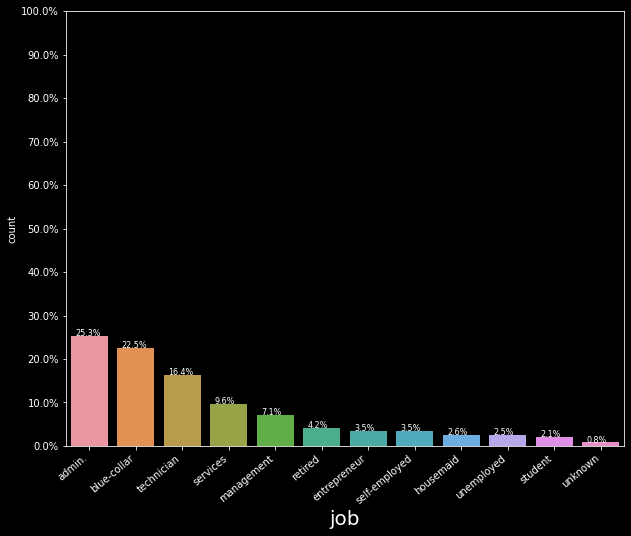


			 📃📃 Discription: type of job 📃📃


In [228]:
cat_countplot('job', data)
print("\n\t\t\t",emoji.emojize(":page_with_curl:")*2
      ,"Discription: type of job"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>The plot of job shows that the 'admin.' job has the highest no. of employees. The 'blue-collar' job has the second highest no. of employees. The rest can be clearly interpreted in a similar manner from the bar-plot. The 5 most common jobs are enough to represent 80% of the data.</font>


		     📈📈📈 Distribution of 'job' w.r.t target 📈📈📈



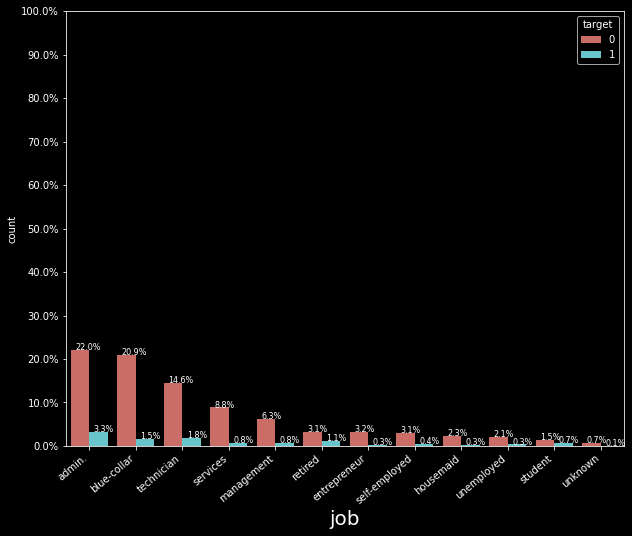

In [229]:
cat_countplot_wrt_Y('job', data)

📝📝 <font color=skyblue>From the bar-plot of job we can see that the job type that subscribed to a term deposit the most is 'admin.', followed by 'blue-collar' and 'students' have the least subscription to a term deposit.</font>


 📈📈 Plotting customers by profession and age 📈📈 



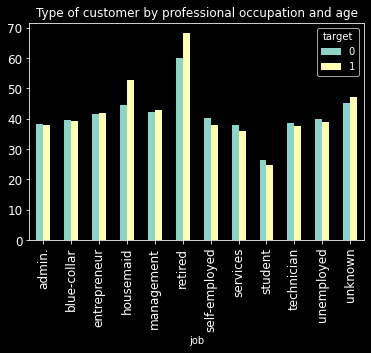

In [230]:
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting customers by profession and age'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')

type_pivot = data.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)
type_pivot.sort_values(by=["job"], ascending=True).plot(kind="bar", title=("Type of customer by professional occupation and age"), figsize=(6,4), fontsize = 12);

📝📝 <font color=skyblue>We see that ‘retired’ and ‘housemaid’ are the oldest clients and the ones who have accepted the subscription more than any of the other classes.</font>

#### <font color=red>Feature : marital</font>



		     📈📈📈 Distribution of 'marital' 📈📈📈



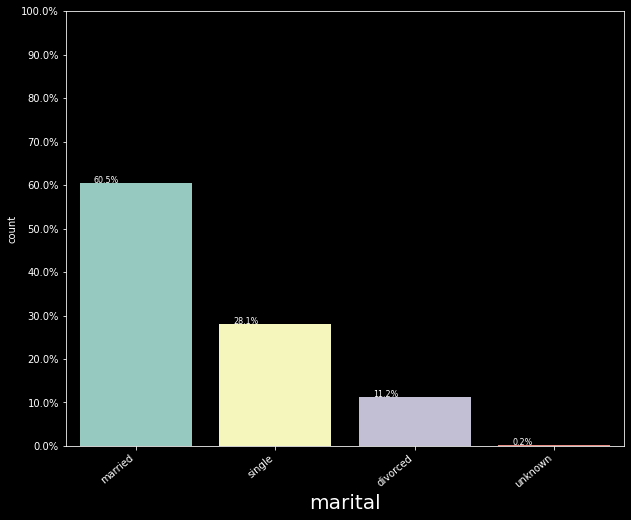


 📃📃 Discription: Marital situation 📃📃


In [231]:
cat_countplot('marital', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: Marital situation"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>The clients who are 'married' are high in records.</font>


		     📈📈📈 Distribution of 'marital' w.r.t target 📈📈📈



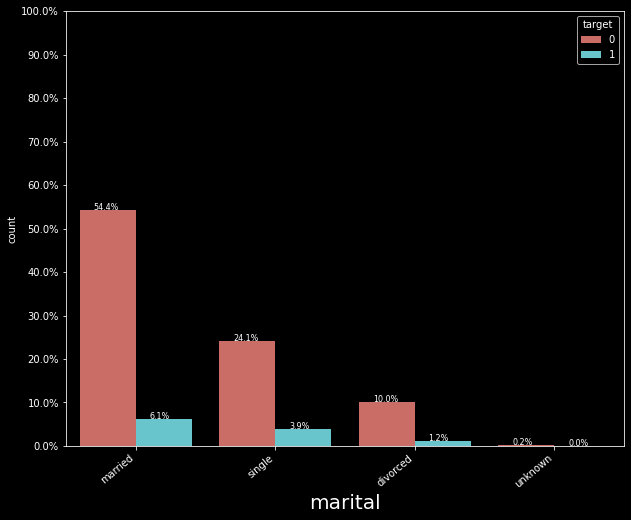


 📃📃 Discription: Marriage Status 📃📃


In [232]:
cat_countplot_wrt_Y('marital', data)

print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: Marriage Status"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>The no. of people who have not subscribed to a term deposit most are 'married'.</font>

#### <font color=red>Feature : education</font>



		     📈📈📈 Distribution of 'education' 📈📈📈



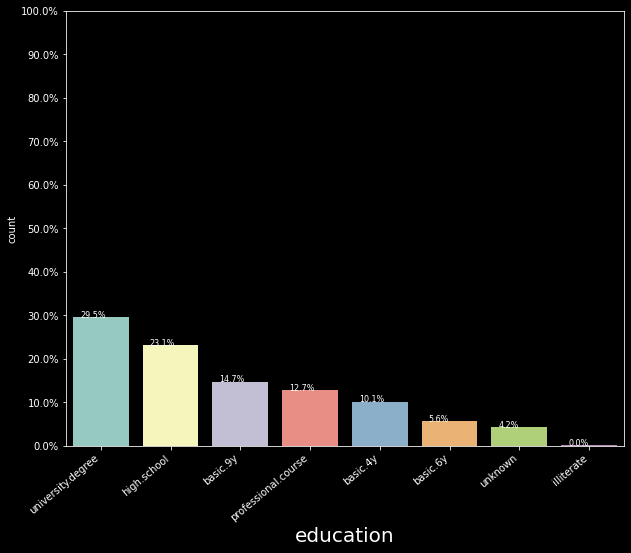


 📃📃 Discription: Education level 📃📃


In [233]:
cat_countplot('education', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: Education level"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>‘Education’ has 8 unique values. The top 4 education levels correspond to 80% of the data. The people having 'university.degree' as highest education show more interest in a term deposit followed by the people having done 'high.school' and 'illiterate' people are not interested in a term deposit.</font>


		     📈📈📈 Distribution of 'education' w.r.t target 📈📈📈



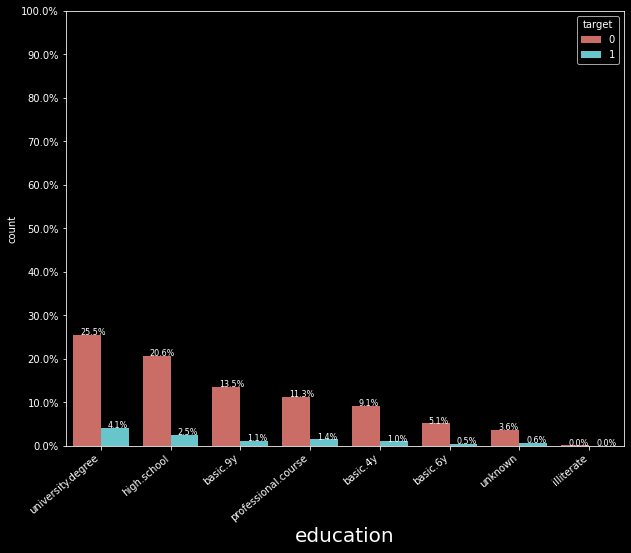

In [234]:
cat_countplot_wrt_Y('education', data)

📝📝 <font color=skyblue>Also the highest refusal to the subscription is made by the 'university.degree' holders followed by 'high.school' graduated. Clients with 4 years basic or illiterate are the oldest and prone to subscribe to the product.</font>

#### <font color=red>Feature : default</font>



		     📈📈📈 Distribution of 'default' 📈📈📈



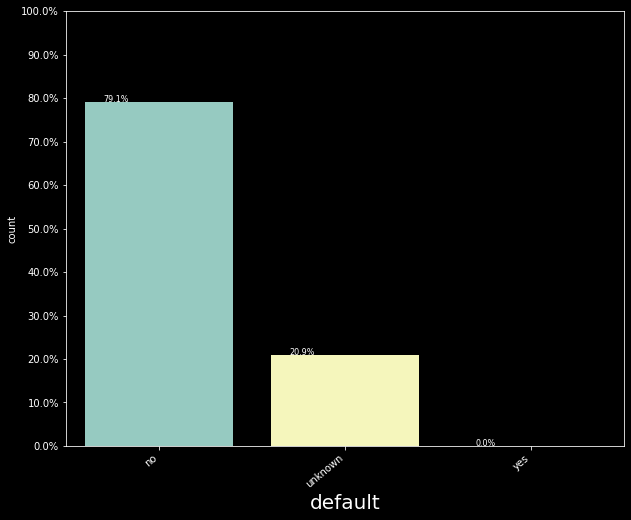


 📃📃 Discription: has credit in default? 📃📃


In [235]:
cat_countplot('default', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: has credit in default?"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>The highest interest in a term deposit is shown by the people who are having no credit 'defaults'.</font>


		     📈📈📈 Distribution of 'default' w.r.t target 📈📈📈



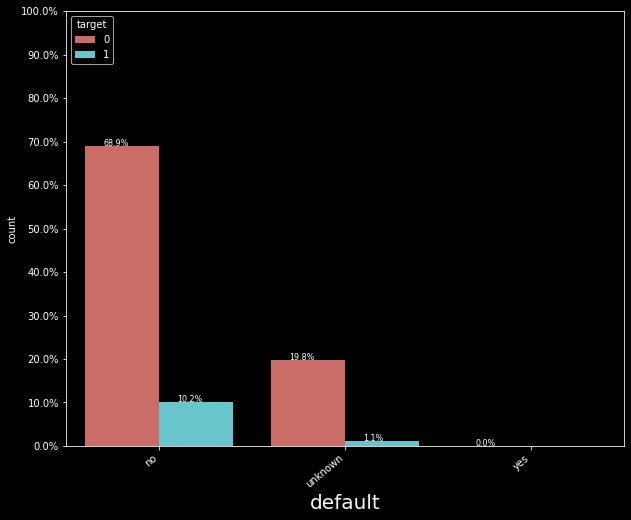

In [236]:
cat_countplot_wrt_Y('default', data)

📝📝 <font color=skyblue>People with no credit defaults are not so interested in subscribing a term deposit. With 3 unique values, the class ‘yes’ is meaningless, the variable is unexpressive and totally imbalanced. So we will drop this column.</font>

#### <font color=red>Feature: housing</font>



		     📈📈📈 Distribution of 'housing' 📈📈📈



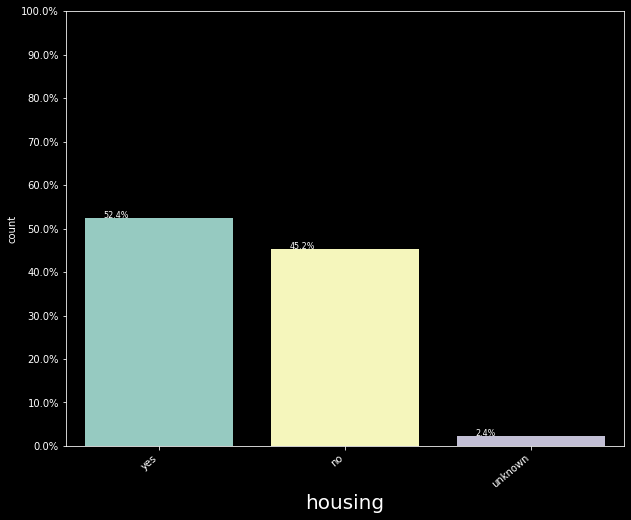


 📃📃 Discription: has housing loan? 📃📃


In [237]:
cat_countplot('housing', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: has housing loan?"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>The proportion of ‘yes’ and ‘no’ is very tight might reduce its predictive power.</font>


		     📈📈📈 Distribution of 'housing' w.r.t target 📈📈📈



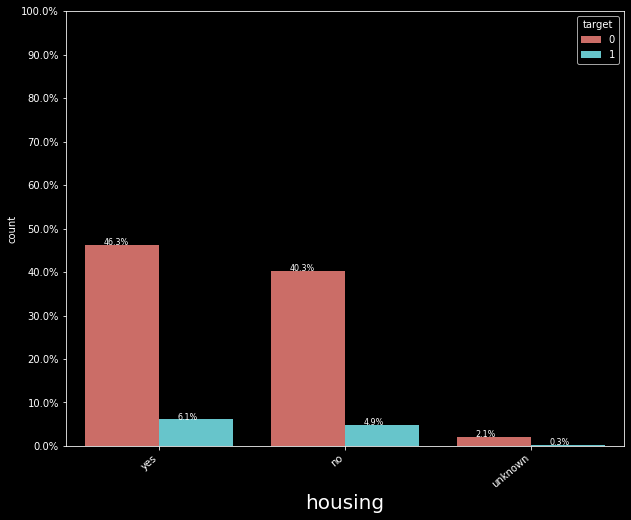

In [238]:
cat_countplot_wrt_Y('housing', data)

📝📝 <font color=skyblue>People with 'housing' loan or without 'housing' loan do not make much difference in the subscription of a term deposit.
</font>

#### <font color=red>Feature: loan</font>



		     📈📈📈 Distribution of 'loan' 📈📈📈



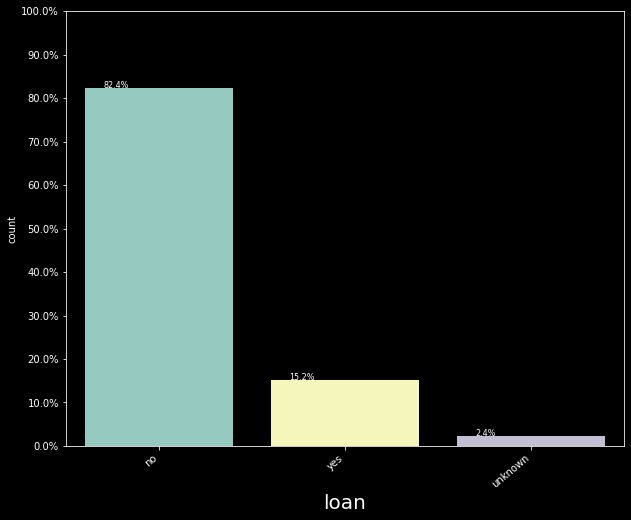


 📃📃 Discription: has personal loan? 📃📃


In [239]:
cat_countplot('loan', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: has personal loan?"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue> ‘loan’ shows a high number of non-subscribers, this variable has some similarities with ‘housing’ in the sense that, proportionally, ‘yes’ and ‘no’ are very even. Once again, it might reduce its predictive power.</font>


		     📈📈📈 Distribution of 'loan' w.r.t target 📈📈📈



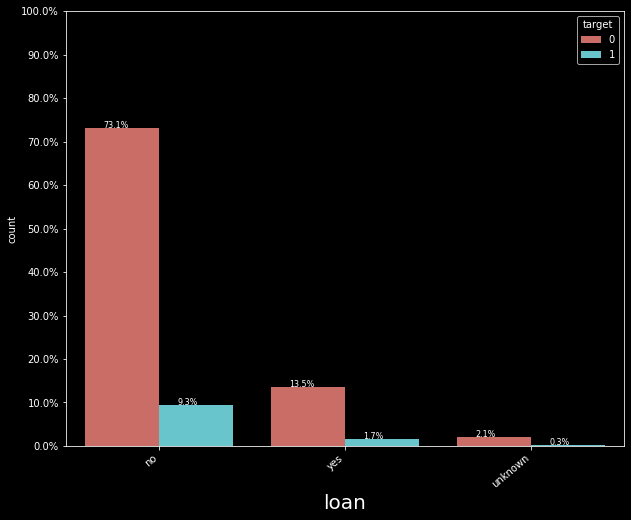

In [240]:
cat_countplot_wrt_Y('loan', data)

📝📝 <font color=skyblue>People with no personal 'loan' tends to be more interested in a term deposit subscription.</font>

#### <font color=red>Feature: contact</font>



		     📈📈📈 Distribution of 'contact' 📈📈📈



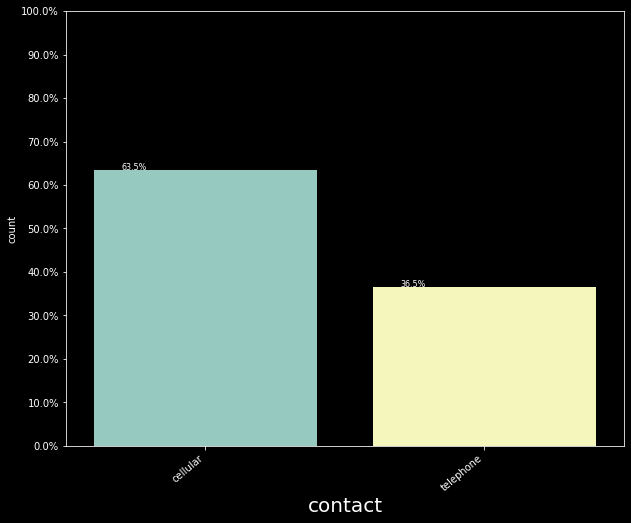


 📃📃 Discription: contact communication type 📃📃


In [241]:
cat_countplot('contact', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: contact communication type"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>Most of the people are contacted through 'cellular'.</font>


		     📈📈📈 Distribution of 'contact' w.r.t target 📈📈📈



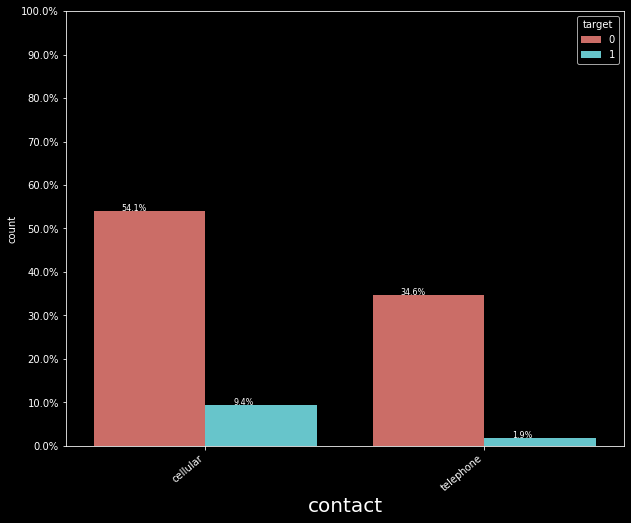

In [242]:
cat_countplot_wrt_Y('contact', data)

📝📝 <font color=skyblue>When the people are contacted through 'cellular' tends to subscribe as well as unsubscribe more than contacted through 'telephone'.</font>

#### <font color=red>Feature: month</font>



		     📈📈📈 Distribution of 'month' 📈📈📈



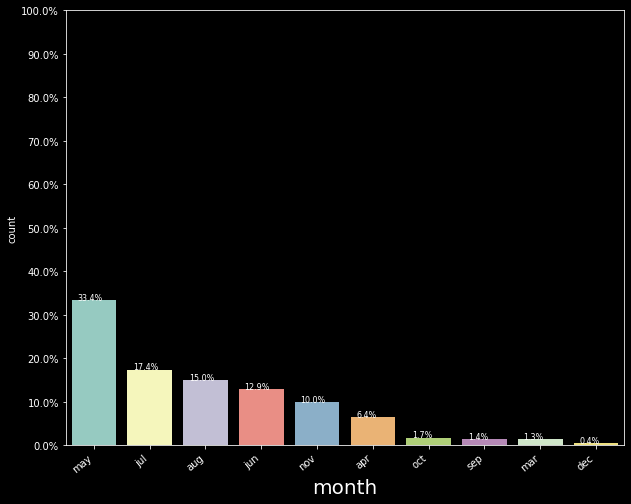


 📃📃 Discription: last contact month of year 📃📃


In [243]:
cat_countplot('month', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: last contact month of year"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>Most of the people were last contacted in the month of May then followed by July & August to a term subscription and least contacted lastly in December.</font>


		     📈📈📈 Distribution of 'month' w.r.t target 📈📈📈



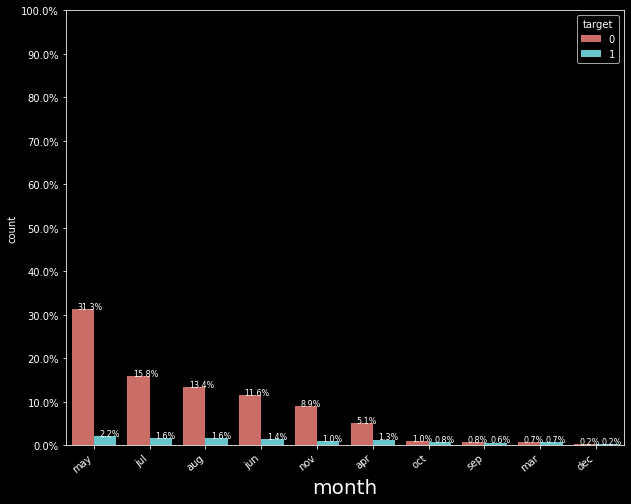

In [244]:
cat_countplot_wrt_Y('month', data)

📝📝 <font color=skyblue>The highest no. of subscription and unsubscription are also made in the month of May then followed by July & August.</font>

#### <font color=red>Feature: day_of_week</font>



		     📈📈📈 Distribution of 'day_of_week' 📈📈📈



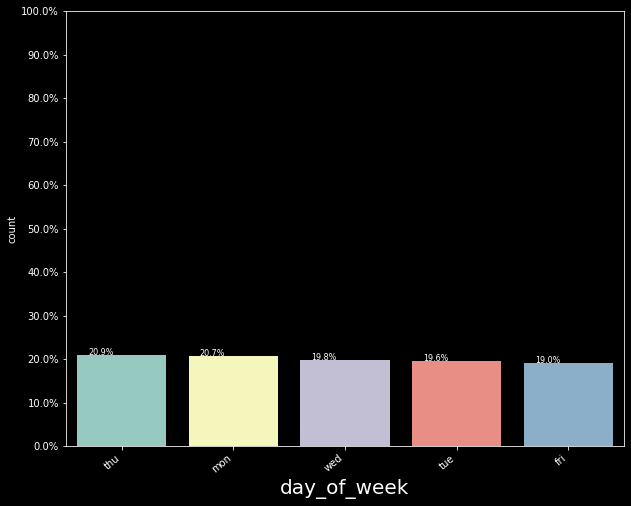


 📃📃 Discription: last contact day of the week 📃📃


In [245]:
cat_countplot('day_of_week', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: last contact day of the week"
      ,emoji.emojize(":page_with_curl:")*2)


		     📈📈📈 Distribution of 'day_of_week' w.r.t target 📈📈📈



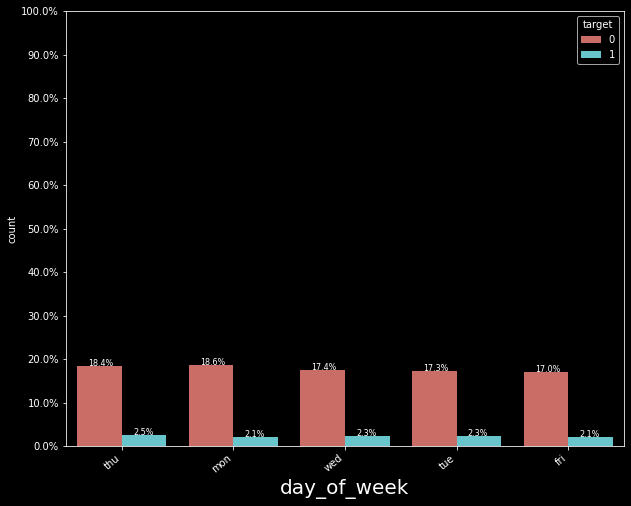

In [246]:
cat_countplot_wrt_Y('day_of_week', data)

📝📝 <font color=skyblue>This feature doesnt make any significant change on the subscription of a term deposit and it can be dropped.</font>

#### <font color=red>Feature: poutcome</font>



		     📈📈📈 Distribution of 'poutcome' 📈📈📈



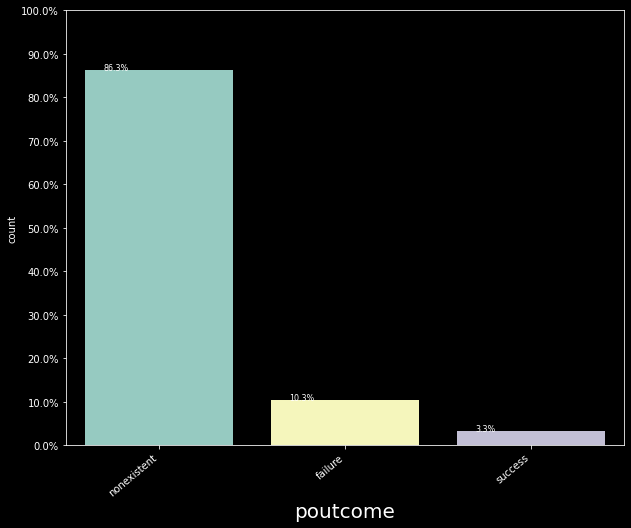


 📃📃 Discription: outcome of the previous marketing campaign 📃📃


In [247]:
cat_countplot('poutcome', data)
print("\n",emoji.emojize(":page_with_curl:")*2
      ,"Discription: outcome of the previous marketing campaign"
      ,emoji.emojize(":page_with_curl:")*2)

📝📝 <font color=skyblue>The outcome in the previous campaigns is mostly as 'nonexistent' followed by 'failure' & 'success'.</font>


		     📈📈📈 Distribution of 'poutcome' w.r.t target 📈📈📈



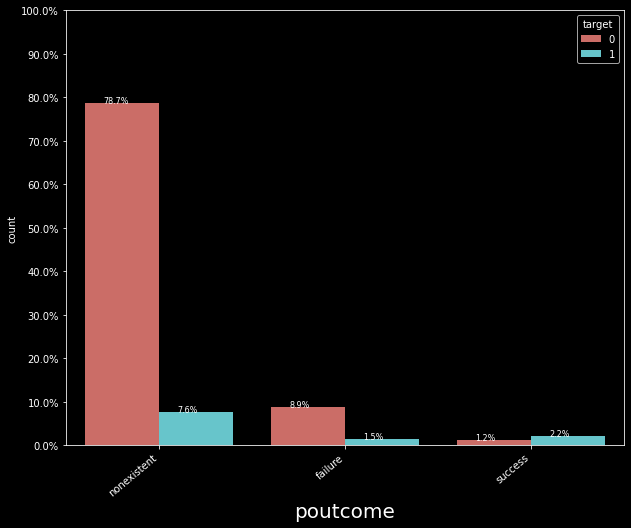

In [248]:
cat_countplot_wrt_Y('poutcome', data)

📝📝 <font color=skyblue>The plot shows 'nonexistent' as the outcome where clients that didn't subscribed to a term deposit is more than the no. of clients that subscribed, 'failure' is the outcome where large no. of clients refused to subscribe than to subscribe to a term deposit, 'success' is the outcome where large no. of clients have subscribed than not subscribed a term deposit in the bank. Interestingly between the clients previously contacted from previous promotional campaigns that actually succeed, the majority subscribed this time.</font>

## <font color=green>11. Exploring most common categories of categorical features</font>


 📈📈📈📈📈📈📈📈📈📈 	 Plotting most common categories 	 📈📈📈📈📈📈📈📈📈📈 



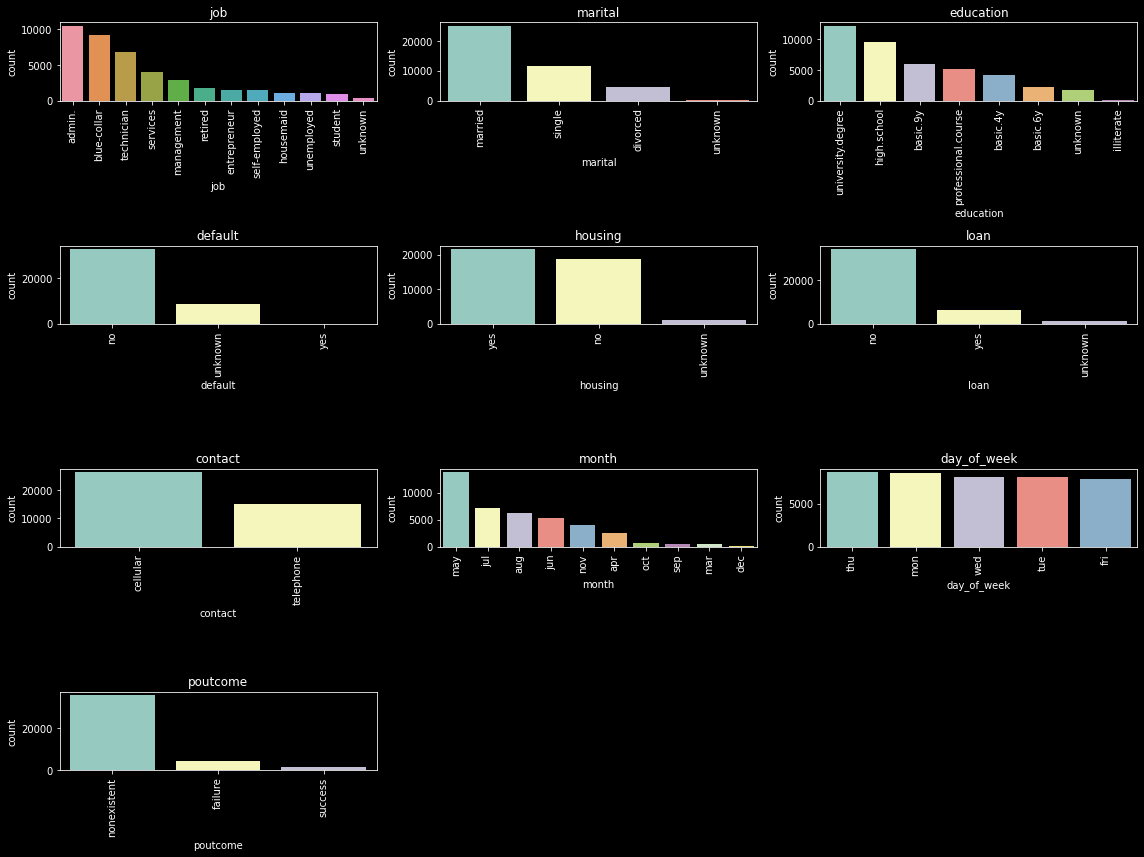

In [249]:
# What are the most common categories?
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*10
      ,'\t'
      ,'Plotting most common categories'
      ,'\t'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*10,'\n')

total = len(categorical_features)
plotnumber=1
plt.style.use('dark_background') 
plt.figure(figsize=(16,14))

for feature in data[categorical_features]:
    ax = plt.subplot(round(total/2),round(total/3), plotnumber)
    sns.countplot(x=data[feature], data=data,order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(feature)
    plotnumber+=1

plt.tight_layout()

📝📝 <font color=skyblue>Most common categories are:<br>
✏️ job: administrative<br>
✏️ marital state: married<br>
✏️ education: university degree<br>
✏️ credit in default: no<br>
✏️ housing: yes, however not having a housing loan is very close<br>
✏️ loan: no<br>
✏️ poutcome: did not participate in previous campaigns<br>
All the features include the category ‘unknown’ except the ‘poutcome’ variable.</font>

## <font color=green>12. Exploring the influence of common categories on the target</font>


 📈📈📈📈📈📈📈📈📈📈 	 Plotting most common categories influencing the target 	 📈📈📈📈📈📈📈📈📈📈 



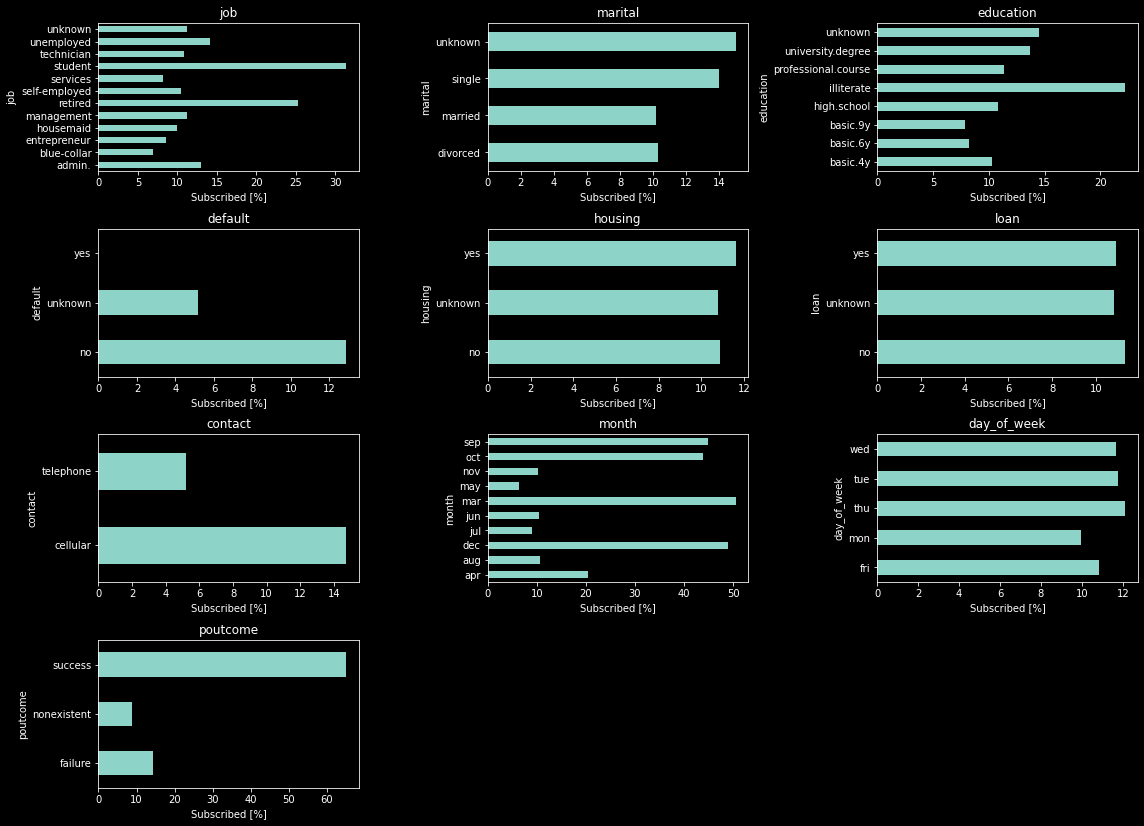

In [250]:
# How these categories influence the target variable?
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*10
      ,'\t'
      ,'Plotting most common categories influencing the target'
      ,'\t'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*10,'\n')

total = len(categorical_features)
plotnumber=1
plt.style.use('dark_background')
plt.figure(figsize=(16,14))

for feature in data[categorical_features]:
    ax = plt.subplot(round(total/2),round(total/3), plotnumber)
    data.groupby([feature])['target'].mean().multiply(100).plot.barh()
    plt.xlabel('Subscribed [%]')
    plt.title(feature)
    plotnumber+=1

plt.tight_layout()

<font color=skyblue>
📝📝 Influence of common categories on the target :<br>
✏️ ‘Student’ and ‘retired’ have the highest percentage of subscriptions (>25%) whereas ‘blue-collar’ and ‘services’ have the lowest.<br>
✏️ ‘Illiterate’ people have the highest percentage of subscriptions (>20%), on the other hand ‘basic 9y’, ‘basic 6y’ and ‘basic 4y’ have the lowest.<br>
✏️ People with credit in default did not subscribe.<br>
✏️ More than 60% of the people previously contacted to other campaigns subscribed.<br>
✏️ Marital state, existence of loans, and housing do not influence much the subscription rate.</font>

## <font color=green>13. Exploring correlation between the numerical features</font>

In [251]:
# Subdivision of target
ynum = num_data.target
Xnum = num_data.drop(["target"], axis= "columns")

In [252]:
# The numeric most correlated with the target (Pearson)
print('\nNumeric features most correlated with the target \n\n'
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

pearson = num_data.corr()
corr_target = pearson.target
corr1 = corr_target.sort_values(ascending=False)
corr1 = corr1.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#139BB4'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).applymap(above_zero).format({'target': "{:.3f}"})
corr1


Numeric features most correlated with the target 

 	 👇🏻👇🏻👇🏻



,target
target,1.000
duration,0.405
previous,0.230
cons_conf_idx,0.055
age,0.030
campaign,-0.066
cons_price_idx,-0.136
emp_var_rate,-0.298
euribor3m,-0.308
pdays,-0.325


In [253]:
print("\nOrdered by rank in absolute values\n\n"
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

corr2 = corr_target.abs().sort_values(ascending=False)
corr2 = corr2.to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#139BB4'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).applymap(above_zero).format({'target': "{:.3f}"})
corr2


Ordered by rank in absolute values

 	 👇🏻👇🏻👇🏻



,target
target,1.000
duration,0.405
nr_employed,0.355
pdays,0.325
euribor3m,0.308
emp_var_rate,0.298
previous,0.230
cons_price_idx,0.136
campaign,0.066
cons_conf_idx,0.055



 📈📈📈📈📈📈📈📈 	 Heatmap visualization: Pearson 	 📈📈📈📈📈📈📈📈 



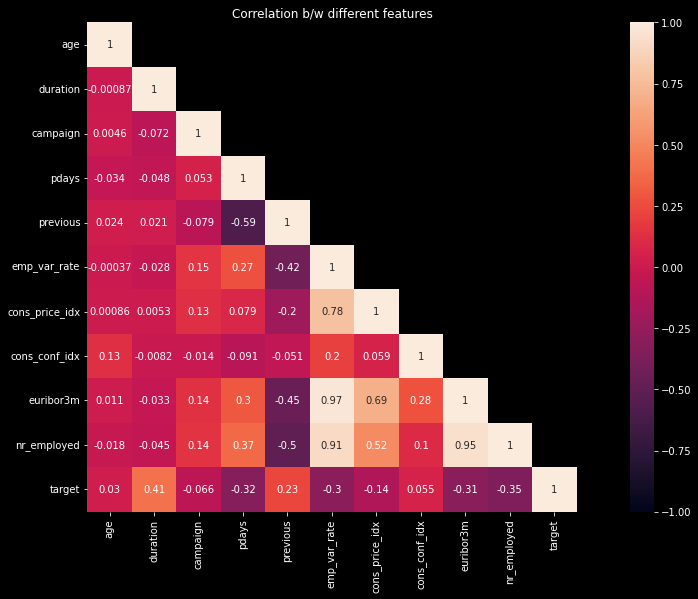

In [254]:
# Heatmap visualization: Pearson
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*8
      ,'\t'
      ,'Heatmap visualization: Pearson'
      ,'\t'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*8,'\n')

mask = np.triu(num_data.corr(method="pearson"), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(num_data.corr(method="pearson"), annot=True, vmax=1, vmin = -1, square=True, mask=mask)
plt.title('Correlation b/w different features')
plt.show()

📝📝 <font color=skyblue>‘Nr_employed’ is the most correlated with the target followed by ‘pdays’, ‘euribor3m’, and ‘emp_avr_rate’ and at the same time, the strength of their relationships with the target is low. </font>

In [255]:
# Checking the predicting power of the features
print("\nChecking the predicting power of the features\n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

# Identifying variables with predictive power (Pearson Correlation p-value)
corr_df = pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], ynum) for col in Xnum.columns],
    columns=["Pearson Corr.", "p-value"],
    index=Xnum.columns,
)
 
corr_df.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#636A92'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).applymap(above_zero, subset=['Pearson Corr.']).format({'Pearson Corr.': "{:.3f}",'p-value' : "{:.3f}"})


Checking the predicting power of the features

 		 👇🏻👇🏻👇🏻



,Pearson Corr.,p-value
age,0.030,0.000
duration,0.405,0.000
campaign,-0.066,0.000
pdays,-0.325,0.000
previous,0.230,0.000
emp_var_rate,-0.298,0.000
cons_price_idx,-0.136,0.000
cons_conf_idx,0.055,0.000
euribor3m,-0.308,0.000
nr_employed,-0.355,0.000


📝📝 <font color=skyblue>It leads us to conclude that all features have predictive power.</font>

📝📝 <font color=skyblue>All linear variable’s relationships are monotonic at the same time but the inverse is not always true, simply because we can have both monotonic non-linear correlations.</font>

In [256]:
# Numeric variables with higher monotonicity (spearman)
data_spearman = num_data.copy()
data_spearman.drop(["target"], axis=1, inplace=True)

In [257]:
print("\nThe 10 most correlated numerical pairs by Spearman method\n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

spearman_rank = pg.pairwise_corr(data_spearman, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
corr_pairs = pd.DataFrame(con.reset_index(drop=True))
corr_pairs.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#053975'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).applymap(above_zero, subset=['r']).format({'r' : "{:.3f}"}).set_properties(**{'background-color': '#D4E0EE'}, subset=['X','Y'])


The 10 most correlated numerical pairs by Spearman method

 		 👇🏻👇🏻👇🏻



,X,Y,r
0,emp_var_rate,nr_employed,0.945
1,emp_var_rate,euribor3m,0.940
2,euribor3m,nr_employed,0.929
3,emp_var_rate,cons_price_idx,0.665
4,cons_price_idx,euribor3m,0.491
5,previous,cons_price_idx,-0.283
6,previous,emp_var_rate,-0.435
7,previous,nr_employed,-0.439
8,previous,euribor3m,-0.455
9,pdays,previous,-0.510



 📈📈📈📈📈📈📈📈 	 Heatmap visualization: Spearman 	 📈📈📈📈📈📈📈📈 



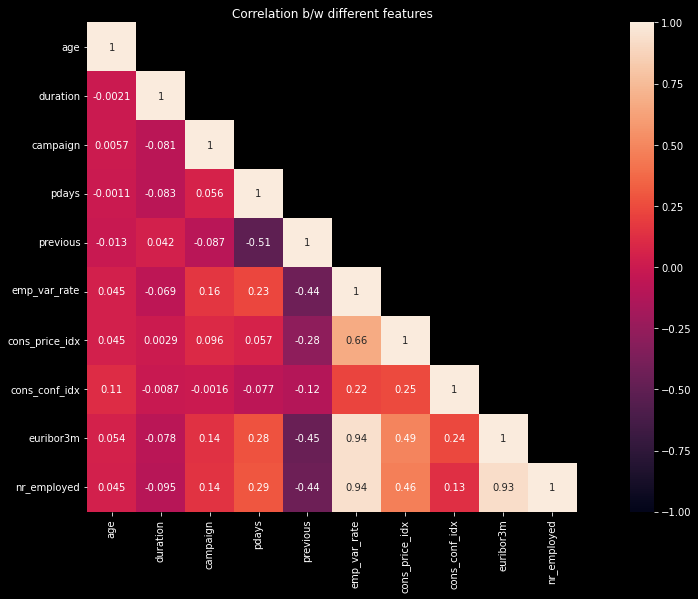

In [258]:
# Heatmap visualization: Spearman
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*8
      ,'\t'
      ,'Heatmap visualization: Spearman'
      ,'\t'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*8,'\n')


mask = np.triu(data_spearman.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data_spearman.corr(method='spearman'), annot=True, vmax=1, vmin = -1, square=True, mask=mask)
plt.title('Correlation b/w different features')
plt.show()

📝📝 <font color=skyblue>‘nr_employed’ is the most correlated with the target. The variables ‘emp_var_rate’, ‘nr_employed’, and ‘euribor3m’ are very redundant but believe this does not represent a big issue. So we will keep all features for the time being.</font>

# <font color=red>Data Preprocessing</font>

In [259]:
# To have a glimpse of the data
print("\nGlimpse of Categorical data : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

#Replacing 'unknown' by NaN
cat_data.replace(to_replace="unknown", value=np.nan, inplace=True)

cat_data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Glimpse of Categorical data :  👇🏻👇🏻👇🏻



,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,nan,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
5,services,married,basic.9y,nan,no,no,telephone,may,mon,nonexistent
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
7,blue-collar,married,nan,nan,no,no,telephone,may,mon,nonexistent
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent


## <font color=green>1. Removing Unwanted Columns</font>

In [260]:
#removing 'duration','default','day_of_week' attributes
cat_data = cat_data.drop(["default","day_of_week"],axis=1)
num_data = num_data.drop("duration",axis=1)
print(emojis.encode(":scissors:")*18
      ,"\n\nUnwanted columns successfully removed !!!\n\n"
      ,emojis.encode(":scissors:")*18)

✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️ 

Unwanted columns successfully removed !!!

 ✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️


In [261]:
print('\nColumns & Rows of both the dataframes \n\n'
,"\t   ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("Categorical Dataframe : ",cat_data.shape)
print("Numerical Dataframe : ",num_data.shape)


Columns & Rows of both the dataframes 

 	    👇🏻👇🏻👇🏻

Categorical Dataframe :  (41188, 8)
Numerical Dataframe :  (41188, 10)


## <font color=green>2. Handling missing values</font>

In [262]:
# Imputation of missing values by the modal value
print('\nImputating missing values by the modal value : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
#cat_data = cat_data.fillna(cat_data.value_counts().index[0])
cat_data_imputed = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data_imputed.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#2B0E46'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Imputating missing values by the modal value :  👇🏻👇🏻👇🏻



,job,marital,education,housing,loan,contact,month,poutcome
0,housemaid,married,basic.4y,no,no,telephone,may,nonexistent
1,services,married,high.school,no,no,telephone,may,nonexistent
2,services,married,high.school,yes,no,telephone,may,nonexistent
3,admin.,married,basic.6y,no,no,telephone,may,nonexistent
4,services,married,high.school,no,yes,telephone,may,nonexistent
5,services,married,basic.9y,no,no,telephone,may,nonexistent
6,admin.,married,professional.course,no,no,telephone,may,nonexistent
7,blue-collar,married,university.degree,no,no,telephone,may,nonexistent
8,technician,single,professional.course,yes,no,telephone,may,nonexistent
9,services,single,high.school,yes,no,telephone,may,nonexistent


## <font color=green>3. Handling Outliers</font>

#### <font color=red>Feature : age</font>

📝📝 <font color=skyblue>It looks like normal distribution. The skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values(outliers). Assuming that age follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers. We have computed Interquantile range as 15.</font>

In [263]:
#calculating the boundaries which differentiate the outliers
IQR = num_data.age.quantile(0.75)-num_data.age.quantile(0.25)
lower_bridge = num_data['age'].quantile(0.25)-(IQR*1.5)
upper_bridge = num_data['age'].quantile(0.75)+(IQR*1.5)
print('\nLower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
print("lower boundary limit : {} \nupper boundary limit : {}".format(lower_bridge,upper_bridge))


Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : 9.5 
upper boundary limit : 69.5


📝📝 <font color=skyblue>The maximum value of age is 98 years and from here we can see that the age value above 69.5 should be treated as outliers.</font>

In [264]:
#replace outliers with upper boundary limit
num_data.loc[num_data['age']>=69.5,'age'] = 69.5

print(emoji.emojize(":plus:")*14
,"\n\nOutliers successfully replaced\n\n"
,emoji.emojize(":plus:")*14)

➕➕➕➕➕➕➕➕➕➕➕➕➕➕ 

Outliers successfully replaced

 ➕➕➕➕➕➕➕➕➕➕➕➕➕➕



		 📈📈📈 Boxplot of 'age' w.r.t target 📈📈📈



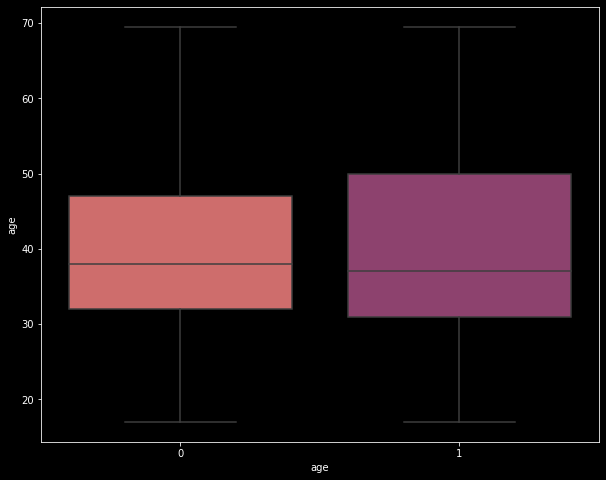


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,0.57
2,Kurtosis,-0.25
3,Median,38.00
4,Count,41188.00
5,Mean,39.94
6,Stand. Dev.,10.13
7,Minimum,17.00
8,Q1 (25%),32.00
9,Q2 (50%),38.00
10,Q3 (75%),47.00


In [265]:
#boxplot and other information after handling outlier
num_boxplot_wrt_Y('age', num_data)

In [266]:
# displaying each categorical feature with its unique no. of categories
# without the category 'unknown' 
cat_features = [feature for feature in cat_data_imputed.columns if (cat_data_imputed[feature].dtypes=='O')]
print("Categorical variables after imputing 'unknown' values.")
for feature in cat_features:
    print("\nThe variable '{}' has {} categories".format(feature,len(cat_data_imputed[feature].unique()))
    ,"\n"
    ,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3
    ,"\n"
    ,"{}".format(cat_data_imputed[feature].unique()))
 

Categorical variables after imputing 'unknown' values.

The variable 'job' has 11 categories 
 		 👇🏻👇🏻👇🏻 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

The variable 'marital' has 3 categories 
 		 👇🏻👇🏻👇🏻 
 ['married' 'single' 'divorced']

The variable 'education' has 7 categories 
 		 👇🏻👇🏻👇🏻 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

The variable 'housing' has 2 categories 
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes']

The variable 'loan' has 2 categories 
 		 👇🏻👇🏻👇🏻 
 ['no' 'yes']

The variable 'contact' has 2 categories 
 		 👇🏻👇🏻👇🏻 
 ['telephone' 'cellular']

The variable 'month' has 10 categories 
 		 👇🏻👇🏻👇🏻 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

The variable 'poutcome' has 3 categories 
 		 👇🏻👇🏻👇🏻 
 ['nonexistent' 'failure' 'success']


#### <font color=red>Feature : campaign</font>

📝📝 <font color=skyblue>The histogram shows that 'campaign' attribute is right-skewed and also the skewness value is 4.8. Now we will calculate the extreme boundaries which differentiate the outliers. We have computed Interquantile range as 2.</font>

In [267]:
# Upper & lower limits of outliers
print('\nLower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
print("lower boundary limit : {} \nupper boundary limit : {}".format(lower_bridge,upper_bridge))



Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : 9.5 
upper boundary limit : 69.5


In [268]:
# Extreme outliers
print('\n Extreme Lower & Upper Limits \n'
,"\n"
,"\t"
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
print("lower boundary limit : {} \nupper boundary limit : {}".format(num_data['campaign'].quantile(0.10),num_data['campaign'].quantile(0.90)))



 Extreme Lower & Upper Limits 
 
 	 👇🏻👇🏻👇🏻

lower boundary limit : 1.0 
upper boundary limit : 5.0


In [269]:
#replace outliers with extreme lower & upper boundary limit
num_data.loc[num_data['campaign']<=1,'campaign'] = 1
num_data.loc[num_data['campaign']>=5,'campaign'] = 5
print(emoji.emojize(":plus:")*20
,"\n\nOutliers successfully replaced with extreme limits\n\n"
,emoji.emojize(":plus:")*20)

➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕ 

Outliers successfully replaced with extreme limits

 ➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕



		 📈📈📈 Boxplot of 'campaign' w.r.t target 📈📈📈



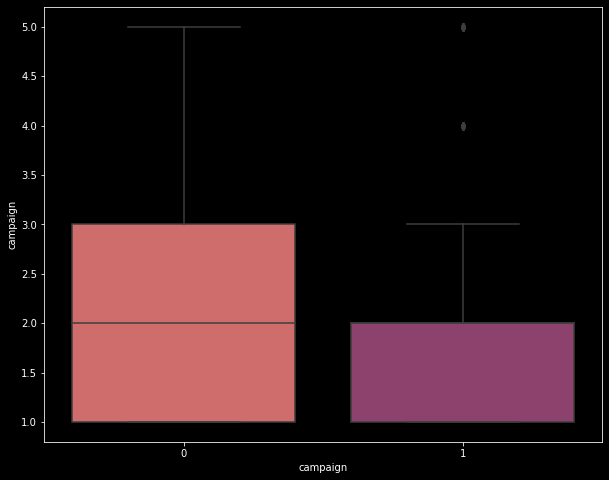


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,0.94
2,Kurtosis,-0.38
3,Median,2.00
4,Count,41188.00
5,Mean,2.19
6,Stand. Dev.,1.37
7,Minimum,1.00
8,Q1 (25%),1.00
9,Q2 (50%),2.00
10,Q3 (75%),3.00


In [270]:
#boxplot and other information after handling outliers
num_boxplot_wrt_Y('campaign', num_data)

#### <font color=red>Feature : previous</font>

📝📝 <font color=skyblue>The method used to identify outliers selects many records which is 14% . so decided to keep the records because the data seems to have been measured correctly and reflects reality. To emphasize that the model is not affected by the extension of the no. of outliers, we will only guarantee that we will use a standardization technique that does not neglect to detail the distances between the central values.</font>

#### <font color=red>Feature : cons_conf_idx</font>

📝📝 <font color=skyblue>Assuming that 'cons_conf_idx' follows a Gaussian Distribution we will calculate the boundaries which differentiate the outliers. We have computed Interquantile range as 6.3.</font>

In [271]:
#calculating the boundaries which differentiate the outliers
print('\nLower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

IQR = num_data.cons_conf_idx.quantile(0.75)-num_data.cons_conf_idx.quantile(0.25)
lower_bridge = num_data['cons_conf_idx'].quantile(0.25)-(IQR*1.5)
upper_bridge = num_data['cons_conf_idx'].quantile(0.75)+(IQR*1.5)
print("lower boundary limit : {:.2f} \nupper boundary limit : {:.2f}".format(lower_bridge,upper_bridge))


Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : -52.15 
upper boundary limit : -26.95


In [272]:
# Extreme outliers
print('\nExtreme Lower & Upper Limits \n'
,"\n"
,"    "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("lower boundary limit : {} \nupper boundary limit : {}".format(num_data['cons_conf_idx'].quantile(0.10),num_data['cons_conf_idx'].quantile(0.90)))



Extreme Lower & Upper Limits 
 
      👇🏻👇🏻👇🏻

lower boundary limit : -46.2 
upper boundary limit : -36.1


In [273]:
#replace outliers with upper boundary limit
num_data.loc[num_data['cons_conf_idx']>=-36,'cons_conf_idx'] = -36
print(emoji.emojize(":plus:")*20
,"\n\nOutliers successfully replaced with extreme limits\n\n"
,emoji.emojize(":plus:")*20)

➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕ 

Outliers successfully replaced with extreme limits

 ➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕



		 📈📈📈 Boxplot of 'cons_conf_idx' w.r.t target 📈📈📈



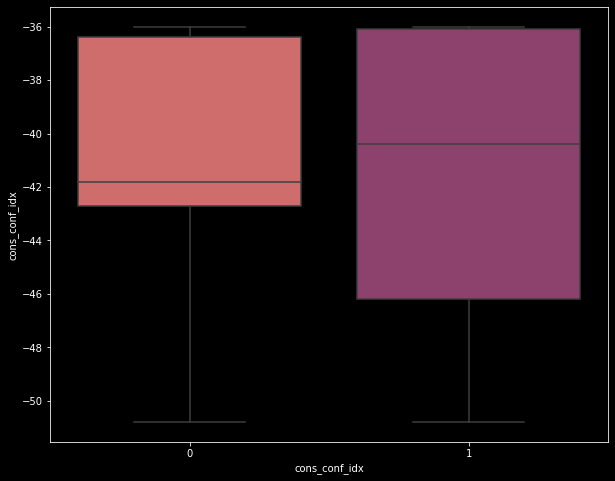


 ✔️✔️ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔️✔️ 



,Parameters,Values
1,Skewness,-0.19
2,Kurtosis,-1.21
3,Median,-41.80
4,Count,41188.00
5,Mean,-40.82
6,Stand. Dev.,4.07
7,Minimum,-50.80
8,Q1 (25%),-42.70
9,Q2 (50%),-41.80
10,Q3 (75%),-36.40


In [274]:
#boxplot and other information after handling outliers
num_boxplot_wrt_Y('cons_conf_idx', num_data)

## <font color=green>4.Transformation</font>

#### <font color=red>Feature : pdays</font>

📝📝 <font color=skyblue>Our dataset is not evenly distributed as the values in pdays are out of range so we need to scale it. splitting 'pdays' feature into 2 features - 'pdays1' and 'pdays2'</font>

In [275]:
# creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
         
num_data['pdays2']=num_data.apply(lambda row: function(row),axis=1)

# changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
     
num_data['pdays']=num_data.apply(lambda row: function1(row),axis=1)
print(emoji.emojize(":plus:")*17
      ,"\n\nNew column 'pdays2' created & replaced\n the 999 values with 30 in 'pdays'\n\n"
      ,emoji.emojize(":plus:")*17)


➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕ 

New column 'pdays2' created & replaced
 the 999 values with 30 in 'pdays'

 ➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕➕


In [276]:
#changing the type of pdays to int
num_data['pdays']=num_data['pdays'].astype('int64')
#renaming column pdays to pdays1
num_data.rename(columns={'pdays': 'pdays1'},inplace=True)
print(emoji.emojize(":thumbs_up_light_skin_tone:")*20
      ,"\n\nSuccessfully converted the type of 'pdays' \n& renamed to 'pdays1'\n\n"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*20)

👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻 

Successfully converted the type of 'pdays' 
& renamed to 'pdays1'

 👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻


## <font color=green>5. Balancing the target variable</font>

In [277]:
print("\nComplete Dataset : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data_new = pd.concat([num_data,cat_data_imputed],axis=1)
data_new.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A60B2E'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Complete Dataset :  👇🏻👇🏻👇🏻



,age,campaign,pdays1,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,pdays2,job,marital,education,housing,loan,contact,month,poutcome
0,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,housemaid,married,basic.4y,no,no,telephone,may,nonexistent
1,57.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,services,married,high.school,no,no,telephone,may,nonexistent
2,37.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,services,married,high.school,yes,no,telephone,may,nonexistent
3,40.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,admin.,married,basic.6y,no,no,telephone,may,nonexistent
4,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,services,married,high.school,no,yes,telephone,may,nonexistent
5,45.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,services,married,basic.9y,no,no,telephone,may,nonexistent
6,59.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,admin.,married,professional.course,no,no,telephone,may,nonexistent
7,41.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,blue-collar,married,university.degree,no,no,telephone,may,nonexistent
8,24.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,technician,single,professional.course,yes,no,telephone,may,nonexistent
9,25.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,services,single,high.school,yes,no,telephone,may,nonexistent


In [278]:
data_new.shape

(41188, 19)

📝📝 <font color=skyblue>Data corresponding to y is very skewed, so we duplicate the tuples corresponding to 'yes'</font>

In [279]:
#handling the imbalance dataset
data1=data_new.copy()
data2=data1[data1.target==1]
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
data1=pd.concat([data1, data2])
bal_data=data1
print(emojis.encode(":crossed_flags:")*9
      ,"\n\nDataset is balanced\n\n"
      ,emojis.encode(":crossed_flags:")*9)

🎌🎌🎌🎌🎌🎌🎌🎌🎌 

Dataset is balanced

 🎌🎌🎌🎌🎌🎌🎌🎌🎌



 📈📈 Plotting the balanced dataset 📈📈 




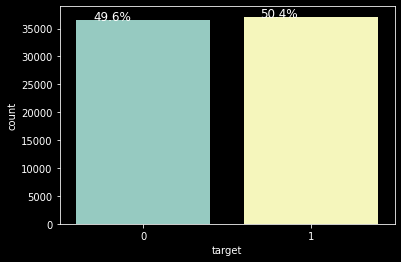

In [280]:
#Checking the dataset is balanced or not based on target values in the classification.
print('\n',emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
      ,'Plotting the balanced dataset'
      ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,'\n')
print("")

plt.style.use('dark_background')
total = len(bal_data['target'])*1
ax=sns.countplot(x='target',data=bal_data)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)
    

📝📝 <font color=skyblue>Now the data looks much more balanced.</font>

## <font color=green>6. Encoding the data</font>

#### <font color=purple>Label Encoding</font>

In [281]:
print('\nEncoded Data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

le_data = bal_data.copy()
le = preprocessing.LabelEncoder()
le_data.job = le.fit_transform(le_data.job)
le_data.marital = le.fit_transform(le_data.marital)
le_data.education = le.fit_transform(le_data.education)
le_data.housing = le.fit_transform(le_data.housing)
le_data.loan = le.fit_transform(le_data.loan)
le_data.contact = le.fit_transform(le_data.contact)
le_data.month = le.fit_transform(le_data.month)
le_data.poutcome = le.fit_transform(le_data.poutcome) 

le_data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Encoded Data :  👇🏻👇🏻👇🏻



,age,campaign,pdays1,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target,pdays2,job,marital,education,housing,loan,contact,month,poutcome
0,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,3,1,0,0,0,1,6,1
1,57.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,7,1,3,0,0,1,6,1
2,37.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,7,1,3,1,0,1,6,1
3,40.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,0,1,1,0,0,1,6,1
4,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,7,1,3,0,1,1,6,1
5,45.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,7,1,2,0,0,1,6,1
6,59.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,0,1,5,0,0,1,6,1
7,41.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,1,1,6,0,0,1,6,1
8,24.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,9,2,5,1,0,1,6,1
9,25.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,7,2,3,1,0,1,6,1


## <font color=green>7. Splitting the data into train & test</font>

In [282]:
# In label encoded data
print('\nLabel Encoded Data without Target :'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
# addinq a new column 'Target' and dropping old column 'target'
ds = le_data.copy()
ds["Target"] = ds["target"]
ds = ds.drop("target",axis=1)

ds.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Label Encoded Data without Target :   👇🏻👇🏻👇🏻



,age,campaign,pdays1,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,pdays2,job,marital,education,housing,loan,contact,month,poutcome,Target
0,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,3,1,0,0,0,1,6,1,0
1,57.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,7,1,3,0,0,1,6,1,0
2,37.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,7,1,3,1,0,1,6,1,0
3,40.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,1,1,0,0,1,6,1,0
4,56.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,7,1,3,0,1,1,6,1,0
5,45.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,7,1,2,0,0,1,6,1,0
6,59.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,0,1,5,0,0,1,6,1,0
7,41.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,1,1,6,0,0,1,6,1,0
8,24.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,9,2,5,1,0,1,6,1,0
9,25.000000,1,30,0,1.100000,93.994000,-36.400000,4.857000,5191,0,7,2,3,1,0,1,6,1,0


In [283]:
# Dividing the label encoded dataset into independent and dependent variables
X = ds.iloc[:, : -1].values
y = ds.iloc[:, -1].values

# Splitting into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(emojis.encode(":scissors:")*22
      ,"\n\nData divided into Dependent & Independent Variables\nand Split into Train & Test data\n\n"
      ,emojis.encode(":scissors:")*22)


✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️ 

Data divided into Dependent & Independent Variables
and Split into Train & Test data

 ✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️


## <font color=green>8. Feature Scaling</font>

In [284]:
# Standardization in the label encoded data
scaler = StandardScaler()
X_train[:, : 10] = scaler.fit_transform(X_train[:, : 10])
X_test[:, : 10] = scaler.transform(X_test[:, : 10])

print(emoji.emojize(":triangular_flag:")*18
      ,"\n\nSuccessfully accomplished feature scaling\n\n"
      ,emoji.emojize(":triangular_flag:")*18)

🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩 

Successfully accomplished feature scaling

 🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩


In [285]:
#convert array into dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(emoji.emojize(":thumbs_up_light_skin_tone:")*18
      ,"\n\nX_train,X_test,y_train & y_test converted into dataframe\n\n"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*18)

👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻 

X_train,X_test,y_train & y_test converted into dataframe

 👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻


# <font color=red>Building Models</font>

In [286]:
# Confusion Matrix
def confusion_mat(y_test,y_pred):
  """
  Takes y_test & y_pred of a model as input and return styler object
   of accuracy, precision,recall & R1 Score for that particular model.

  """
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix : "
  ,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3,"\n")
  plt.style.use('dark_background')
  sns.heatmap(cm,annot=True,fmt='d')
  plt.show()
  print("")

  accuracy = metrics.accuracy_score(y_pred, y_test)*100
  precision = metrics.precision_score(y_pred,y_test)*100
  recall = metrics.recall_score(y_pred,y_test)*100
  r1_score  = metrics.f1_score(y_pred,y_test)*100

  v1 = pd.DataFrame({'Parameters': 'Accuracy Score'
                   , 'Values' : "{:.2f}".format(accuracy)},index={'1'})
  
  v2 = pd.DataFrame({'Parameters': 'Precision Score'
                   , 'Values' : "{:.2f}".format(precision)},index={'2'})
  
  v3 = pd.DataFrame({'Parameters': 'Recall Score'
                   , 'Values' : "{:.2f}".format(recall)},index={'3'})
  
  v4 = pd.DataFrame({'Parameters': 'R1 Score'
                  , 'Values' : "{:.2f}".format(r1_score)},index={'4'})
  
  result = pd.concat([v1,v2,v3,v4])
  result.columns = ['Parameters','Values']
  result = result.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#34495E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#FEF5E7'}, subset=['Parameters'])

  return result    

In [287]:
# AUC_ROC curve
def plot_roc_curve(y_test,y_pred,label,color):
    """
    Takes y_test, y_pred, label & color as input and plots the ROC curve.
    
    """
    print("\n",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
              ,"Plotting ROC Curve"
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2,"\n")
    print("")
    plt.style.use('dark_background')
    plt.figure(figsize=(8,5))
    plt.title('ROC Curve')
    # Computing False postive rate, and True positive rate
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    # Calculating Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,y_pred)
    # Now, plotting the computed values
    plt.plot(fpr, tpr,label = label , color=color, linewidth=2)
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc="lower right")
    plt.show()

In [288]:
def kf_score(acc):
  """
  Takes accuracy of the model as input and returns styler object of 
  mean and standard deviation of accuracy of that particular model.
  
  """
  r1 = pd.DataFrame({'Score': 'Accuracy', 'Values' : "{:.2f}".format(acc.mean()*100)},index={'1'})
  r2 = pd.DataFrame({'Score': 'Stand. Dev.', 'Values' : "{:.2f}".format(acc.std()*100)},index={'2'})

  res = pd.concat([r1,r2])
  res.columns = ['Score','Values']
  res=res.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#A60B2E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#F2DBE0'}, subset=['Score'])

  return res

In [289]:
def grid_cv_params(model,param1,param2):
  """
  Takes model and two parameters for which values are to be determined
  and returns styler object of Acuuracy and Best parameters.
  
  """
  print("After Tuning Parameters : "
  ,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3,"\n")

  p1 = model.best_params_[param1]
  p2 = model.best_params_[param2]
  r1 = pd.DataFrame({'Parameters': 'Accuracy', 'Values' : "{:.2f}".format((model.best_score_)*100)},index={'1'})
  r2 = pd.DataFrame({'Parameters': 'Best Parameters', 'Values' : "'{}': {} {} '{}': '{}'".format(param1,p1,",",param2,p2)},index={'2'})

  res = pd.concat([r1,r2])
  res.columns = ['Parameters','Values']
  res=res.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#035753'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#CAEEE5'}, subset=['Parameters'])

  return res

## <font color=green>1. Linear Logistic Regression</font>

#### <font color=blue>Training the model</font>

In [290]:
# Training the model
model1 = LogisticRegression()
model1 = model1.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>

In [291]:
y_pred1 = model1.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



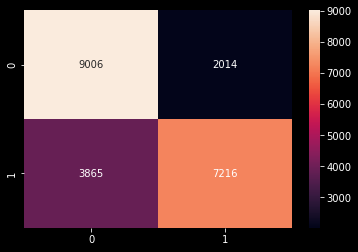

,Parameters,Values
1,Accuracy Score,73.40
2,Precision Score,65.12
3,Recall Score,78.18
4,R1 Score,71.06


In [292]:
confusion_mat(y_test,y_pred1)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




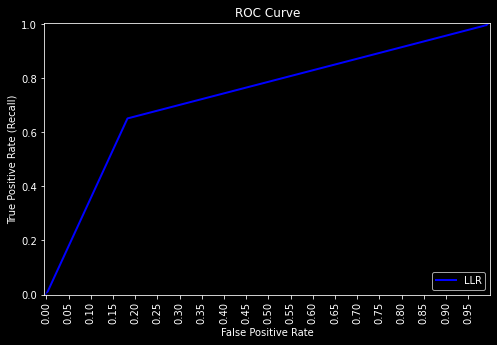

In [293]:
plot_roc_curve(y_test,y_pred1,"LLR","blue")

#### <font color=brown>Applying k-fold cross validation</font>


In [294]:
acc_llr_kf = cross_val_score(estimator=model1, X=X_train, y=y_train, cv=10)

In [295]:
kf_score(acc_llr_kf)

,Score,Values
1,Accuracy,73.22
2,Stand. Dev.,0.56


## <font color=green>2. Polynomial Logistic Regression(with degree=3)</font>

#### <font color=blue>Training the model</font>

In [296]:
poly_feat = PolynomialFeatures(degree=3)
X_train_poly = poly_feat.fit_transform(X_train)

In [297]:
# Training the model on the label encoded training set
model2 = LogisticRegression()
model2 = model2.fit(X_train_poly,y_train)

#### <font color=blue>Testing the model</font>


In [298]:
y_pred2 = model2.predict(poly_feat.fit_transform(X_test))

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



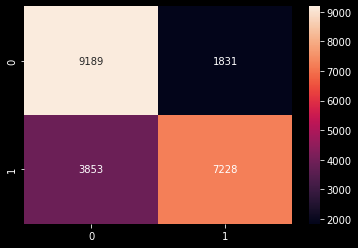

,Parameters,Values
1,Accuracy Score,74.28
2,Precision Score,65.23
3,Recall Score,79.79
4,R1 Score,71.78


In [299]:
confusion_mat(y_test,y_pred2)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




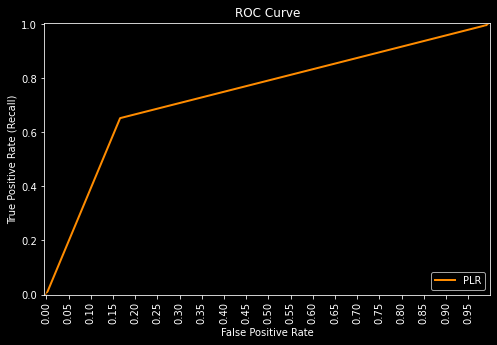

In [300]:
plot_roc_curve(y_test,y_pred2,"PLR","darkorange")

#### <font color=brown>Applying k-fold cross validation</font>

In [301]:
acc_plr_kf = cross_val_score(estimator=model2, X=X_train_poly, y=y_train, cv=10)

In [302]:
kf_score(acc_plr_kf)

,Score,Values
1,Accuracy,74.17
2,Stand. Dev.,0.53


## <font color=green>3. K-NN</font>

#### <font color=blue>Training the model</font>

In [303]:
# Training the model on the label encoded training set
model3 = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2)
model3 = model3.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>


In [304]:
y_pred3 = model3.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



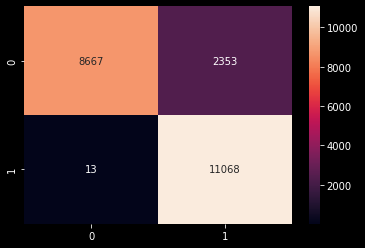

,Parameters,Values
1,Accuracy Score,89.29
2,Precision Score,99.88
3,Recall Score,82.47
4,R1 Score,90.34


In [305]:
confusion_mat(y_test,y_pred3)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




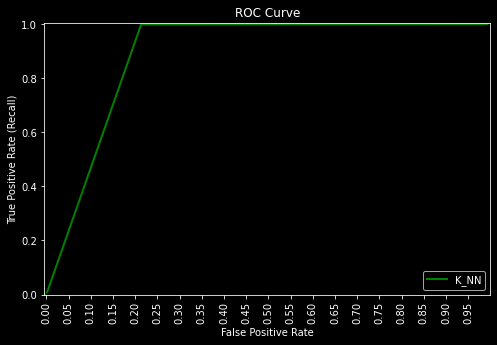

In [306]:
plot_roc_curve(y_test,y_pred3,"K_NN","green")

#### <font color=brown>Tuning parameters with GridsearchCV</font>

In [ ]:
param_grid3 = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights':['uniform','distance']}
model3_gscv = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid3, cv=10)
model3_gscv = model3_gscv.fit(X_train,y_train)

In [308]:
grid_cv_params(model3_gscv,'n_neighbors','weights')

After Tuning Parameters :  👇🏻👇🏻👇🏻 



,Parameters,Values
1,Accuracy,90.86
2,Best Parameters,"'n_neighbors': 3 , 'weights': 'distance'"


## <font color=green>4. Random Forest</font>

#### <font color=blue>Training the model</font>

In [309]:
# Training the model on the label encoded training set
model4 = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
model4 = model4.fit(X_train,y_train)

#### <font color=blue>Testing the model</font>

In [310]:
y_pred4 = model4.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



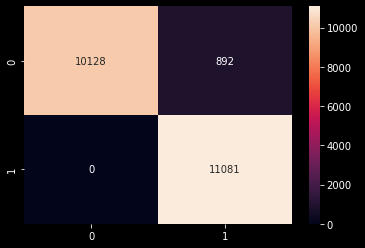

,Parameters,Values
1,Accuracy Score,95.96
2,Precision Score,100.00
3,Recall Score,92.55
4,R1 Score,96.13


In [311]:
confusion_mat(y_test,y_pred4)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




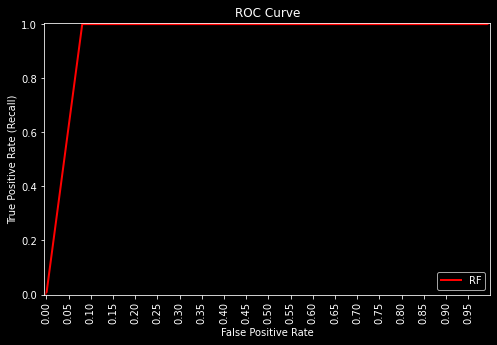

In [312]:
plot_roc_curve(y_test,y_pred4,"RF","red")

#### <font color=pink>Feature Importance from Random Forest Model</font>

In [313]:
model4.feature_importances_

indices = np.argsort(model4.feature_importances_)[::-1]

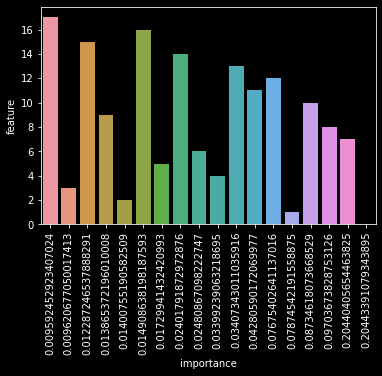

In [314]:
X_train = pd.DataFrame(X_train)
indices = np.argsort(model4.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         model4.feature_importances_[indices[f]]]

plt.style.use('dark_background')
ax=sns.barplot( y = 'feature', x = 'importance', data = feature_rank)
plt.xticks(rotation=90)
plt.show()

#### <font color=brown>Tuning parameters with GridsearchCV</font>

In [315]:
param_grid4 = {'max_features':[5,6,7,8,9,10,11,12],'n_estimators':[50,60,70,80,90,100]}
model4_gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid4, cv=5,verbose=True, n_jobs=-1)
model4_detector = model4_gscv.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [316]:
grid_cv_params(model4_detector,'n_estimators','max_features')

After Tuning Parameters :  👇🏻👇🏻👇🏻 



,Parameters,Values
1,Accuracy,95.25
2,Best Parameters,"'n_estimators': 80 , 'max_features': '5'"


## <font color=green>5. XGBoost</font>

#### <font color=blue>Training the model</font>

In [317]:
# Training the model on the label encoded training set
model5 = XGBClassifier(n_estimators=200 ,random_state = 42,n_jobs=-1,verbose=1)
model5 = model5.fit(X_train,y_train)

[10:18:17] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### <font color=blue>Testing the model</font>

In [318]:
y_pred5 = model5.predict(X_test)

#### <font color=blue>Confusion Matrix</font>

Confusion Matrix :  👇🏻👇🏻👇🏻 



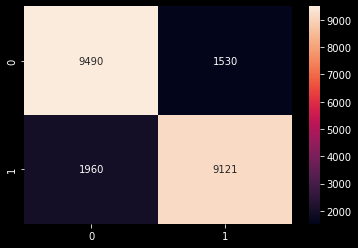

,Parameters,Values
1,Accuracy Score,84.21
2,Precision Score,82.31
3,Recall Score,85.64
4,R1 Score,83.94


In [319]:
confusion_mat(y_test,y_pred5)

#### <font color=blue>ROC Curve</font>


 📈📈 Plotting ROC Curve 📈📈 




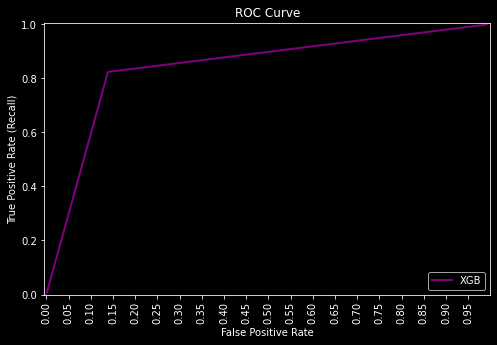

In [320]:
plot_roc_curve(y_test,y_pred5,"XGB","purple")

#### <font color=brown>After tuning all parameters </font>

In [321]:
xgb_estimator = XGBClassifier( learning_rate=0.01,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=1,
                              subsample=0.8,colsample_bytree=0.8,n_jobs=-1,reg_alpa=1,scale_pos_weight=1,random_state=42,verbose=1)

In [322]:
xgb_estimator.fit(X_train, y_train)

[10:18:24] WARNING: ../src/learner.cc:576: 
Parameters: { "reg_alpa", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:18:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpa=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [323]:
y_pred_xgb = xgb_estimator.predict(X_test)

Confusion Matrix :  👇🏻👇🏻👇🏻 



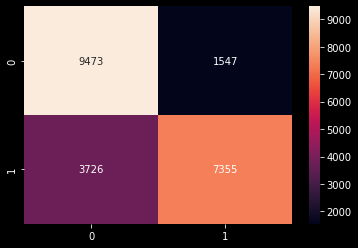

,Parameters,Values
1,Accuracy Score,76.14
2,Precision Score,66.37
3,Recall Score,82.62
4,R1 Score,73.61


In [324]:
confusion_mat(y_test,y_pred_xgb)


 📈📈 Plotting ROC Curve 📈📈 




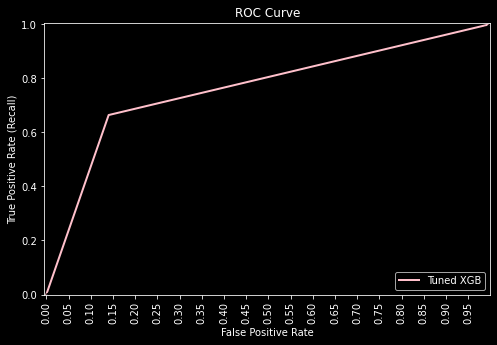

In [325]:
plot_roc_curve(y_test,y_pred_xgb,"Tuned XGB","pink")

# <font color=red>Plotting AUC_ROC of all the Models</font>

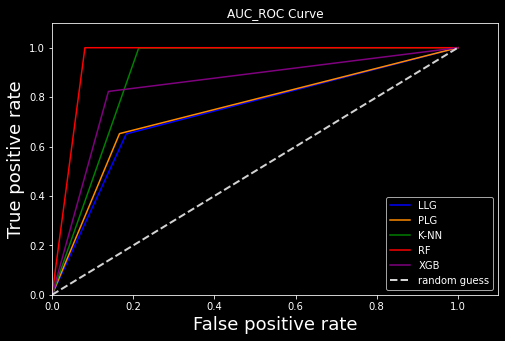

In [326]:
# AUC_ROC curve
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
plt.title('AUC_ROC Curve')

# Computing False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
# Calculating Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_test,y_pred1)
# Now, plotting the computed values
plt.plot(fpr1, tpr1, label = 'LLG', color='blue')

# Computing False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
# Calculating Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_test,y_pred2)
# Now, plotting the computed values
plt.plot(fpr2, tpr2,label = 'PLG', color='darkorange')

# Computing False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
# Calculating Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_test,y_pred3)
# Now, plotting the computed values
plt.plot(fpr3, tpr3, label = 'K-NN', color='green')

# Computing False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)
# Calculating Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_test,y_pred4)
# Now, plotting the computed values
plt.plot(fpr4, tpr4, label = 'RF', color='red')

# Computing False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)
# Calculating Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_test,y_pred5)
# Now, plotting the computed values
plt.plot(fpr5, tpr5, label = 'XGB', color='purple')


x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 10)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()


# <font color=red>Conclusion</font>

In [327]:
print("\nModels accuracy metrics before tuning the parameters\n\n"
,"\t\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

a1 = pd.DataFrame({'Models': 'Linear Logistic Regression'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred1, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred1, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred1, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred1, y_test)*100)},index={'1'})

a2 = pd.DataFrame({'Models': 'Polynomial Logistic Regression'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred2, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred2, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred2, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred2, y_test)*100)},index={'2'})

a3 = pd.DataFrame({'Models': 'K-Nearest Neighbors Classifier'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred3, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred3, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred3, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred3, y_test)*100)},index={'3'})

a4 = pd.DataFrame({'Models': 'Random Forest Classifier'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred4, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred4, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred4, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred4, y_test)*100)},index={'4'})

a5 = pd.DataFrame({'Models': 'X-Gradient Boosting Classifier'
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred5, y_test)*100)
                 ,'Precision' : "{:.2f}%".format(metrics.precision_score(y_pred5, y_test)*100)
                 ,'Recall' : "{:.2f}%".format(metrics.recall_score(y_pred5, y_test)*100)
                 ,'R1 Score' : "{:.2f}%".format(metrics.f1_score(y_pred5, y_test)*100)},index={'5'})

res_table = pd.concat([a1,a2,a3,a4,a5])
res_table.columns = ['Models','Accuracy','Precision','Recall','R1 Score']
res_table=res_table.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background', '#636A92'),
                ('color', 'white'),
                ('font-family', 'verdana'),
                ('font-size', '10pt')]},
   
    {'selector': 'td',
     'props': [('font-family', 'verdana'),
               ('padding','0em 0em')]},
            
    {'selector': 'tr:nth-of-type(odd)',
     'props': [('background', '#ABB2B9'),
               ('color', 'black')]},
  
    {'selector': 'tr:nth-of-type(even)',
     'props': [('background', 'white'),
               ('color', 'black')]},
 
    {'selector': 'tr:hover',
     'props': [('background-color', 'pink')]},
    
    {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

    ]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Models'])

res_table


Models accuracy metrics before tuning the parameters

 			 👇🏻👇🏻👇🏻



,Models,Accuracy,Precision,Recall,R1 Score
1,Linear Logistic Regression,73.40%,65.12%,78.18%,71.06%
2,Polynomial Logistic Regression,74.28%,65.23%,79.79%,71.78%
3,K-Nearest Neighbors Classifier,89.29%,99.88%,82.47%,90.34%
4,Random Forest Classifier,95.96%,100.00%,92.55%,96.13%
5,X-Gradient Boosting Classifier,84.21%,82.31%,85.64%,83.94%


In [328]:
print("\nModels accuracy after tuning the parameters\n\n"
,"\t\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

b1 = pd.DataFrame({'Models': "Linear Logistic Regression(With K-Fold Cross Validation)"
                 ,'Accuracy' : "{:.2f}%".format(acc_llr_kf.mean()*100)},index={'1'})

b2 = pd.DataFrame({'Models': "Polynomial Logistic Regression(With K-Fold Cross Validation)"
                 ,'Accuracy' : "{:.2f}%".format(acc_plr_kf.mean()*100)},index={'2'})

b3 = pd.DataFrame({'Models': "K-Nearest Neighbors Classifier(With Gridsearch CV)"
                 ,'Accuracy' : "{:.2f}%".format((model3_gscv.best_score_)*100)},index={'3'})

b4 = pd.DataFrame({'Models': "Random Forest Classifier(With Gridsearch CV)"
                 ,'Accuracy' : "{:.2f}%".format((model4_detector.best_score_)*100)},index={'4'})

b5 = pd.DataFrame({'Models': "X-Gradient Boosting Classifier(With tuning all parameters)"
                 ,'Accuracy' : "{:.2f}%".format(metrics.accuracy_score(y_pred_xgb, y_test)*100)},index={'5'})

result_table = pd.concat([b1,b2,b3,b4,b5])
result_table.columns = ['Models','Accuracy']
result_table=result_table.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#E06689'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).set_properties(**{'background-color': '#FEF5E7'}, subset=['Models'])
result_table


Models accuracy after tuning the parameters

 			 👇🏻👇🏻👇🏻



,Models,Accuracy
1,Linear Logistic Regression(With K-Fold Cross Validation),73.22%
2,Polynomial Logistic Regression(With K-Fold Cross Validation),74.17%
3,K-Nearest Neighbors Classifier(With Gridsearch CV),90.86%
4,Random Forest Classifier(With Gridsearch CV),95.25%
5,X-Gradient Boosting Classifier(With tuning all parameters),76.14%


## <font color=green>Comparing the results of all the Models</font>

In [329]:
df1_styler = res_table.set_table_attributes("style='display:inline'").set_caption('Before tuning the parameters')
df2_styler = result_table.set_table_attributes("style='display:inline'").set_caption('After tuning the parameters')

space = "\xa0" * 10
display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)

Before tuning the parameters 
 
 
   
 Models 
 Accuracy 
 Precision 
 Recall 
 R1 Score 
 
 
 
 
 1 
 Linear Logistic Regression 
 73.40% 
 65.12% 
 78.18% 
 71.06% 
 
 
 2 
 Polynomial Logistic Regression 
 74.28% 
 65.23% 
 79.79% 
 71.78% 
 
 
 3 
 K-Nearest Neighbors Classifier 
 89.29% 
 99.88% 
 82.47% 
 90.34% 
 
 
 4 
 Random Forest Classifier 
 95.96% 
 100.00% 
 92.55% 
 96.13% 
 
 
 5 
 X-Gradient Boosting Classifier 
 84.21% 
 82.31% 
 85.64% 
 83.94% 
 
 
 
          
 
 After tuning the parameters 
 
 
   
 Models 
 Accuracy 
 
 
 
 
 1 
 Linear Logistic Regression(With K-Fold Cross Validation) 
 73.22% 
 
 
 2 
 Polynomial Logistic Regression(With K-Fold Cross Validation) 
 74.17% 
 
 
 3 
 K-Nearest Neighbors Classifier(With Gridsearch CV) 
 90.86% 
 
 
 4 
 Random Forest Classifier(With Gridsearch CV) 
 95.25% 
 
 
 5 
 X-Gradient Boosting Classifier(With tuning all parameters) 
 76.14%

📝📝 <font color=skyblue></font>